In [1]:
pwd

'/home/jwangiy/Reimage/my_reimagine/reimagine/notebooks'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

In [3]:
'/home/jwangiy/Reimage/img_data/'

'/home/jwangiy/Reimage/img_data/'

In [4]:
import os.path as op

IMAGE_WIDTH = {5: 15, 20: 60, 60: 180}
IMAGE_HEIGHT = {5: 32, 20: 64, 60: 96}  

In [5]:
year = 2017
images = np.memmap(op.join("/home/jwangiy/Reimage/img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_images.dat"), dtype=np.uint8, mode='r').reshape(
                        (-1, IMAGE_HEIGHT[20], IMAGE_WIDTH[20]))

In [6]:
print(images.shape)
images[0]

(67858, 64, 60)


memmap([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0, 255,   0, ...,   0,   0,   0],
        [  0, 255,   0, ...,   0,   0,   0],
        [  0, 255,   0, ...,   0, 255,   0]], dtype=uint8)

#### project struture
[struture](https://drivendata.github.io/cookiecutter-data-science/#directory-structure)

### Load Labels

- 'Date': The last day of the 20-day rolling window for the chart.
- 'StockID': CRSP PERMNO that identifies the stock.
- 'MarketCap': Market capitalization in dollar, recorded in thousands.
- 'Ret_{t}d': t=5,20,60, next t-day holding period return.
- 'Ret_month': Holding period return for the next month, from the current monthend to the next monthend.
- 'EWMA_vol': Exponentially weighted volatility (square of daily returns) with alpha as 0.05. One day delay is included.

In [7]:
label_df = pd.read_feather(op.join("/home/jwangiy/Reimage/img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))
label_df.head()

,Date,StockID,EWMA_vol,Retx,Retx_5d,Retx_20d,Retx_60d,Retx_week,Retx_month,Retx_quarter,Retx_tstat,Retx_5d_tstat,Retx_20d_tstat,Retx_60d_tstat,MarketCap,Retx_label,Retx_5d_label,Retx_20d_label,Retx_60d_label,window_size,next_month_ret_0delay,next_month_ret_1delay,Ret,log_ret,cum_log_ret,Ret_week,Ret_month,Ret_quarter,Ret_5d,Ret_20d,Ret_60d,Ret_65d,Ret_180d,Ret_250d,Ret_260d
0,2017-01-31,10001,0.000450,0.000000,4.370390e-07,-0.000002,-0.011860,NaN,-0.000002,NaN,0.000000,0.000970,-0.003558,-26.333479,133078.0,0,1,0,0,20,-0.000002,-1.602515e-06,0.000000,0.000000,2.075332,NaN,-0.000002,NaN,4.370390e-07,-0.000002,-0.005954,0.001998,NaN,NaN,NaN
1,2017-02-28,10001,0.000180,-0.003937,3.951997e-03,-0.003162,0.003953,NaN,0.003953,NaN,-21.800550,21.883593,-17.509703,21.889278,133078.0,0,1,0,1,20,0.003953,1.167940e-07,-0.003937,-0.003945,2.075331,NaN,0.009953,NaN,3.951997e-03,0.002795,0.009953,0.005977,NaN,NaN,NaN
2,2017-03-31,10001,0.000064,0.007936,-7.874612e-03,-0.015749,0.015748,-0.007875,-0.015749,0.017717,121.541489,-120.601311,-241.194656,241.189789,133604.0,1,0,0,1,20,-0.015749,-1.185839e-02,0.007936,0.007905,2.085234,-0.007875,-0.015749,0.023704,-7.874612e-03,-0.015749,0.021723,0.021724,NaN,NaN,NaN
3,2017-04-28,10001,0.000030,0.000000,9.999881e-03,0.016001,0.032002,0.010000,0.016001,NaN,0.000000,331.985138,531.231934,1062.430298,131500.0,0,1,1,1,20,0.016001,1.200149e-02,0.000000,0.000000,2.069360,0.010000,0.016001,NaN,9.999880e-03,0.016001,0.038072,0.050143,NaN,NaN,NaN
4,2017-05-31,10001,0.000015,0.000000,4.370390e-07,0.015748,NaN,NaN,0.017717,NaN,0.000000,0.029490,1062.581055,NaN,133604.0,0,1,1,2,20,0.017717,1.976318e-02,0.000000,0.000000,2.085235,NaN,0.023703,NaN,4.370390e-07,0.021722,NaN,NaN,NaN,NaN,NaN


### Plot the sample images

0


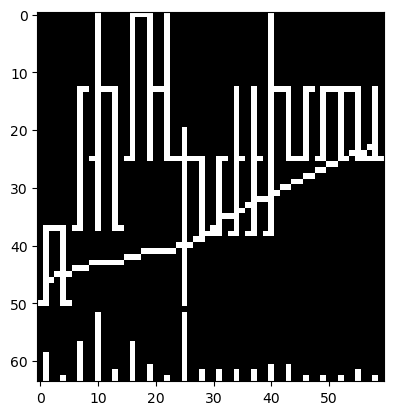

1


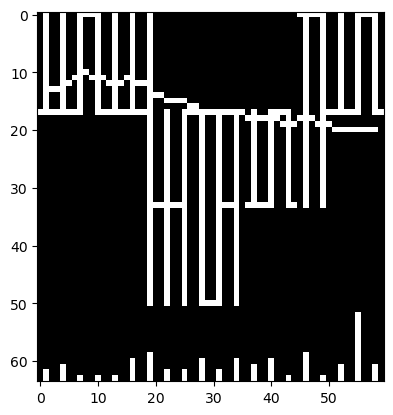

2


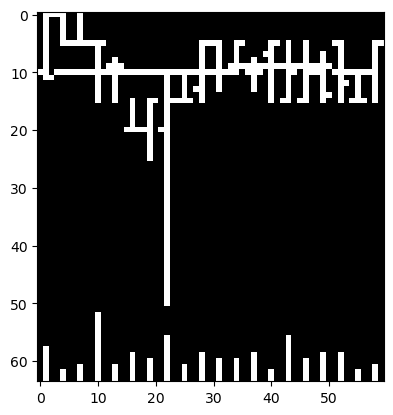

3


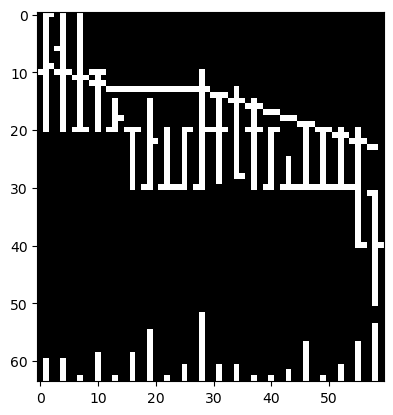

4


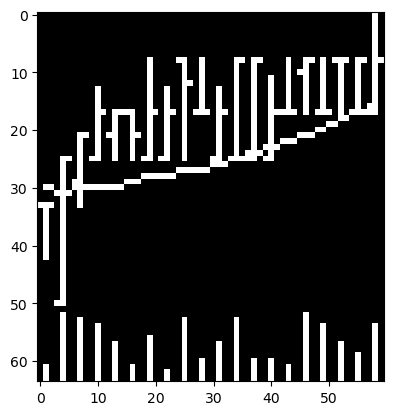

In [8]:
from matplotlib import pyplot as plt
for i in range(5):
    print(i)
    plt.imshow(images[i], cmap='gray')
    plt.show()

In [9]:
label_df.shape, images.shape

((67858, 35), (67858, 64, 60))

### Build Models

In [10]:
target = 'Retx_20d_label'
label_df[target].value_counts()

Retx_20d_label
1    36878
0    30637
2      343
Name: count, dtype: int64

In [14]:
## WT
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from tqdm import tqdm
import pickle

from sklearn.model_selection import train_test_split
from torch.utils import data 
from torch.autograd import Variable 
import torch
import torch.nn as nn
from torch.nn import init

import torch
from torchvision import datasets,transforms
import torch.utils.data as Dataset
# from torchsummary import summary

In [15]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=(5,3), stride=(3,1), dilation=(2,1), padding=(12,1)),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.MaxPool2d((2, 1), stride=(2, 1)),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=(5,3), stride=(3,1), dilation=(2,1), padding=(12,1)),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.MaxPool2d((2, 1), stride=(2, 1)),
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=(5,3), stride=(3,1), dilation=(2,1), padding=(12,1)),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.MaxPool2d((2, 1), stride=(2, 1)),
        )
        self.fc1 = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(46080, 2),
        )
       
    def forward(self, x):
        x = x.reshape(-1,1,64,60)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.reshape(-1,46080)
        x = self.fc1(x)
        return x

In [16]:
class CNNDataset(Dataset.Dataset):
    def __init__(self, Data, Label):
        self.Data = Data
        self.Label = Label
    def __len__(self):
        return len(self.Data)
    def __getitem__(self, index):
        data = torch.Tensor(self.Data[index])
        label = torch.Tensor(self.Label[index])
        
        return data, label

In [17]:
type(images)

numpy.memmap

In [18]:
train_val_years = list(range(1993, 1999+1))
test_years = list(range(1999+1, 2019+1))

images_train = []
for year in train_val_years:
    images_temp = np.memmap(op.join("/home/jwangiy/Reimage/img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_images.dat"), dtype=np.uint8, mode='r').reshape(
                        (-1, IMAGE_HEIGHT[20], IMAGE_WIDTH[20]))
    images_train.append(images_temp)
images_train = np.concatenate(images_train)

images_test = []
for year in test_years:
    images_temp = np.memmap(op.join("/home/jwangiy/Reimage/img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_images.dat"), dtype=np.uint8, mode='r').reshape(
                        (-1, IMAGE_HEIGHT[20], IMAGE_WIDTH[20]))
    images_test.append(images_temp)
images_test = np.concatenate(images_test)

In [19]:
del images_temp
images_train.shape, images_test.shape

((694871, 64, 60), (1502123, 64, 60))

In [20]:
target = 'Retx_20d_label'

In [21]:
label_train = []
for year in train_val_years:
    label_temp = pd.read_feather(op.join("/home/jwangiy/Reimage/img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))
    label_train.append(label_temp)
    
label_train = pd.concat(label_train)[[target]]

label_test = []
for year in test_years:
    label_temp = pd.read_feather(op.join("/home/jwangiy/Reimage/img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))
    label_test.append(label_temp)
    
label_test = pd.concat(label_test)[[target]]

In [22]:
del label_temp
label_train.shape, label_test.shape

((694871, 1), (1502123, 1))

In [23]:
label_test[target] = label_test[target].apply(lambda x: 0 if x == 0 else 1)
label_train[target] = label_train[target].apply(lambda x: 0 if x == 0 else 1)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(images_train, label_train, test_size=0.3, random_state=0, shuffle=True)

In [25]:
train_dataset = CNNDataset(x_train, y_train.values)
val_dataset = CNNDataset(x_val, y_val.values)
test_dataset = CNNDataset(images_test, label_test.values)

train_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=128, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [26]:
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print([torch.cuda.get_device_name(i) for i in range(0, torch.cuda.device_count())])

True
0
['NVIDIA GeForce RTX 3090', 'NVIDIA GeForce RTX 3090', 'NVIDIA GeForce RTX 3090', 'NVIDIA GeForce RTX 3090']


In [27]:
model = CNN()
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
device_ids=range(torch.cuda.device_count())
model.cuda(device=device_ids[3])

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 3), stride=(3, 1), padding=(12, 1), dilation=(2, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 3), stride=(3, 1), padding=(12, 1), dilation=(2, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(5, 3), stride=(3, 1), padding=(12, 1), dilation=(2, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): MaxPoo

In [28]:
try:
    os.mkdir("./cnn_model")
except Exception as e:
    pass

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
          l_n = - w_{y_n} \log \frac{\exp(x_{n,y_n})}{\sum_{c=1}^C \exp(x_{n,c})}
          \cdot \mathbb{1}\{y_n \not= \text{ignore\_index}\}$

$\ell(x, y) = \begin{cases}
              \sum_{n=1}^N \frac{1}{\sum_{n=1}^N w_{y_n} \cdot \mathbb{1}\{y_n \not= \text{ignore\_index}\}} l_n, &
               \text{if reduction} = \text{`mean';}\\
                \sum_{n=1}^N l_n,  &
                \text{if reduction} = \text{`sum'.}
            \end{cases}$

In [29]:
loss_func = torch.nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr=0.00001)

In [38]:
help(torch.optim.Adam)

Help on class Adam in module torch.optim.adam:

class Adam(torch.optim.optimizer.Optimizer)
 |  Adam(params: Union[Iterable[torch.Tensor], Iterable[Dict[str, Any]]], lr: Union[float, torch.Tensor] = 0.001, betas: Tuple[float, float] = (0.9, 0.999), eps: float = 1e-08, weight_decay: float = 0, amsgrad: bool = False, *, foreach: Optional[bool] = None, maximize: bool = False, capturable: bool = False, differentiable: bool = False, fused: Optional[bool] = None)
 |  
 |  Implements Adam algorithm.
 |  
 |  .. math::
 |     \begin{aligned}
 |          &\rule{110mm}{0.4pt}                                                                 \\
 |          &\textbf{input}      : \gamma \text{ (lr)}, \beta_1, \beta_2
 |              \text{ (betas)},\theta_0 \text{ (params)},f(\theta) \text{ (objective)}          \\
 |          &\hspace{13mm}      \lambda \text{ (weight decay)},  \: \textit{amsgrad},
 |              \:\textit{maximize}                                                              \\
 

In [30]:
%%time

loss_count = []
epochs = 100
global_loss_train = []
global_loss_test = []
global_loss_val = []
for epoch in range(epochs):
    for i,(x,y) in enumerate(train_loader):
        batch_x = Variable(x.cuda(device=device_ids[3]))
        batch_y = Variable(y.cuda(device=device_ids[3]))
        out = model(batch_x.float())
        loss = loss_func(out,batch_y.squeeze().long())
        opt.zero_grad()
        loss.backward() 
        opt.step()
        if i%20 == 0:
            temp = loss.cpu()
            loss_count.append(temp.detach().numpy())
            print('epoch:', format(epoch+1),f'iteration: {i+1}:\t','loss:', loss.item())
            torch.save(model,r'./cnn_model/ret_20_classification_model_checkpoint.pt')
    
    loss_val_epoch = [] 
    for x,y in val_loader:
        batch_x = Variable(x.cuda(device=device_ids[3]))
        batch_y = Variable(y.cuda(device=device_ids[3]))
        prediction = model(batch_x)
        loss = loss_func(prediction, batch_y.squeeze().long())
        loss_val_epoch.append(loss.cpu().detach().numpy())
        
    loss_val = np.mean(loss_val_epoch)
    global_loss_val.append(loss_val)

    loss_train = loss_count[-1]
    global_loss_train.append(loss_train)

#     early_stopping(loss_val, model)
#     if early_stopping.early_stop:
#         print("Early stopping")
#         break
    print('----------------epoch '+str(epoch+1)+' end---------------------')

epoch: 1 iteration: 1:	 loss: 0.8580390214920044
epoch: 1 iteration: 21:	 loss: 0.7791633009910583
epoch: 1 iteration: 41:	 loss: 0.793067216873169
epoch: 1 iteration: 61:	 loss: 0.8349165320396423
epoch: 1 iteration: 81:	 loss: 0.8198455572128296
epoch: 1 iteration: 101:	 loss: 0.7714187502861023
epoch: 1 iteration: 121:	 loss: 0.688826858997345
epoch: 1 iteration: 141:	 loss: 0.7137065529823303
epoch: 1 iteration: 161:	 loss: 0.8568029999732971
epoch: 1 iteration: 181:	 loss: 0.7406386137008667
epoch: 1 iteration: 201:	 loss: 0.8391521573066711
epoch: 1 iteration: 221:	 loss: 0.7667658925056458
epoch: 1 iteration: 241:	 loss: 0.8243709206581116
epoch: 1 iteration: 261:	 loss: 0.7653164267539978
epoch: 1 iteration: 281:	 loss: 0.7485966682434082
epoch: 1 iteration: 301:	 loss: 0.7276128530502319
epoch: 1 iteration: 321:	 loss: 0.8188522458076477
epoch: 1 iteration: 341:	 loss: 0.8211818337440491
epoch: 1 iteration: 361:	 loss: 0.7657667994499207
epoch: 1 iteration: 381:	 loss: 0.74751

epoch: 1 iteration: 3201:	 loss: 0.7402861714363098
epoch: 1 iteration: 3221:	 loss: 0.7322267293930054
epoch: 1 iteration: 3241:	 loss: 0.7137293219566345
epoch: 1 iteration: 3261:	 loss: 0.6988608241081238
epoch: 1 iteration: 3281:	 loss: 0.7286595702171326
epoch: 1 iteration: 3301:	 loss: 0.7172881960868835
epoch: 1 iteration: 3321:	 loss: 0.6835275888442993
epoch: 1 iteration: 3341:	 loss: 0.7296886444091797
epoch: 1 iteration: 3361:	 loss: 0.7004402279853821
epoch: 1 iteration: 3381:	 loss: 0.7187579870223999
epoch: 1 iteration: 3401:	 loss: 0.7212488055229187
epoch: 1 iteration: 3421:	 loss: 0.7308262586593628
epoch: 1 iteration: 3441:	 loss: 0.7135133147239685
epoch: 1 iteration: 3461:	 loss: 0.7307267189025879
epoch: 1 iteration: 3481:	 loss: 0.7073652744293213
epoch: 1 iteration: 3501:	 loss: 0.706205427646637
epoch: 1 iteration: 3521:	 loss: 0.7408849000930786
epoch: 1 iteration: 3541:	 loss: 0.7009512782096863
epoch: 1 iteration: 3561:	 loss: 0.6857221722602844
epoch: 1 iter

epoch: 2 iteration: 2541:	 loss: 0.6943482756614685
epoch: 2 iteration: 2561:	 loss: 0.7131974101066589
epoch: 2 iteration: 2581:	 loss: 0.7228652834892273
epoch: 2 iteration: 2601:	 loss: 0.7030436992645264
epoch: 2 iteration: 2621:	 loss: 0.7002681493759155
epoch: 2 iteration: 2641:	 loss: 0.7306562066078186
epoch: 2 iteration: 2661:	 loss: 0.6736024618148804
epoch: 2 iteration: 2681:	 loss: 0.6889301538467407
epoch: 2 iteration: 2701:	 loss: 0.6944910287857056
epoch: 2 iteration: 2721:	 loss: 0.6868289709091187
epoch: 2 iteration: 2741:	 loss: 0.6866125464439392
epoch: 2 iteration: 2761:	 loss: 0.6980574131011963
epoch: 2 iteration: 2781:	 loss: 0.7102961540222168
epoch: 2 iteration: 2801:	 loss: 0.6814175248146057
epoch: 2 iteration: 2821:	 loss: 0.7192586064338684
epoch: 2 iteration: 2841:	 loss: 0.7531929016113281
epoch: 2 iteration: 2861:	 loss: 0.6943627595901489
epoch: 2 iteration: 2881:	 loss: 0.677632749080658
epoch: 2 iteration: 2901:	 loss: 0.7188765406608582
epoch: 2 iter

epoch: 3 iteration: 1901:	 loss: 0.690222978591919
epoch: 3 iteration: 1921:	 loss: 0.7113262414932251
epoch: 3 iteration: 1941:	 loss: 0.7012767791748047
epoch: 3 iteration: 1961:	 loss: 0.7266678810119629
epoch: 3 iteration: 1981:	 loss: 0.7301937341690063
epoch: 3 iteration: 2001:	 loss: 0.696236789226532
epoch: 3 iteration: 2021:	 loss: 0.7215942144393921
epoch: 3 iteration: 2041:	 loss: 0.6764615774154663
epoch: 3 iteration: 2061:	 loss: 0.7113747000694275
epoch: 3 iteration: 2081:	 loss: 0.6846287250518799
epoch: 3 iteration: 2101:	 loss: 0.7020661234855652
epoch: 3 iteration: 2121:	 loss: 0.7002167105674744
epoch: 3 iteration: 2141:	 loss: 0.6941874027252197
epoch: 3 iteration: 2161:	 loss: 0.6734205484390259
epoch: 3 iteration: 2181:	 loss: 0.6766634583473206
epoch: 3 iteration: 2201:	 loss: 0.6793238520622253
epoch: 3 iteration: 2221:	 loss: 0.6963691711425781
epoch: 3 iteration: 2241:	 loss: 0.6975994110107422
epoch: 3 iteration: 2261:	 loss: 0.6896497011184692
epoch: 3 itera

epoch: 4 iteration: 1261:	 loss: 0.6834567785263062
epoch: 4 iteration: 1281:	 loss: 0.6986861228942871
epoch: 4 iteration: 1301:	 loss: 0.7106503844261169
epoch: 4 iteration: 1321:	 loss: 0.6994978189468384
epoch: 4 iteration: 1341:	 loss: 0.6859310269355774
epoch: 4 iteration: 1361:	 loss: 0.6943957805633545
epoch: 4 iteration: 1381:	 loss: 0.6974412798881531
epoch: 4 iteration: 1401:	 loss: 0.693988561630249
epoch: 4 iteration: 1421:	 loss: 0.6638897657394409
epoch: 4 iteration: 1441:	 loss: 0.7239271998405457
epoch: 4 iteration: 1461:	 loss: 0.6841873526573181
epoch: 4 iteration: 1481:	 loss: 0.6757010221481323
epoch: 4 iteration: 1501:	 loss: 0.695734977722168
epoch: 4 iteration: 1521:	 loss: 0.6971065402030945
epoch: 4 iteration: 1541:	 loss: 0.720985472202301
epoch: 4 iteration: 1561:	 loss: 0.7029531598091125
epoch: 4 iteration: 1581:	 loss: 0.6793535351753235
epoch: 4 iteration: 1601:	 loss: 0.6917570233345032
epoch: 4 iteration: 1621:	 loss: 0.7093697190284729
epoch: 4 iterat

epoch: 5 iteration: 601:	 loss: 0.7088345885276794
epoch: 5 iteration: 621:	 loss: 0.6789752840995789
epoch: 5 iteration: 641:	 loss: 0.6579102277755737
epoch: 5 iteration: 661:	 loss: 0.6896330118179321
epoch: 5 iteration: 681:	 loss: 0.7120251059532166
epoch: 5 iteration: 701:	 loss: 0.6929303407669067
epoch: 5 iteration: 721:	 loss: 0.6837765574455261
epoch: 5 iteration: 741:	 loss: 0.7179752588272095
epoch: 5 iteration: 761:	 loss: 0.7160741686820984
epoch: 5 iteration: 781:	 loss: 0.6757842898368835
epoch: 5 iteration: 801:	 loss: 0.6922149062156677
epoch: 5 iteration: 821:	 loss: 0.6991910338401794
epoch: 5 iteration: 841:	 loss: 0.6893969178199768
epoch: 5 iteration: 861:	 loss: 0.6784261465072632
epoch: 5 iteration: 881:	 loss: 0.6839531660079956
epoch: 5 iteration: 901:	 loss: 0.6945512890815735
epoch: 5 iteration: 921:	 loss: 0.7048757672309875
epoch: 5 iteration: 941:	 loss: 0.7012225389480591
epoch: 5 iteration: 961:	 loss: 0.7073195576667786
epoch: 5 iteration: 981:	 loss:

epoch: 5 iteration: 3781:	 loss: 0.6943187117576599
epoch: 5 iteration: 3801:	 loss: 0.6940129995346069
----------------epoch 5 end---------------------
epoch: 6 iteration: 1:	 loss: 0.6961128115653992
epoch: 6 iteration: 21:	 loss: 0.6734499335289001
epoch: 6 iteration: 41:	 loss: 0.6865128874778748
epoch: 6 iteration: 61:	 loss: 0.6818706393241882
epoch: 6 iteration: 81:	 loss: 0.683972954750061
epoch: 6 iteration: 101:	 loss: 0.6741193532943726
epoch: 6 iteration: 121:	 loss: 0.6942436099052429
epoch: 6 iteration: 141:	 loss: 0.667392373085022
epoch: 6 iteration: 161:	 loss: 0.6711925864219666
epoch: 6 iteration: 181:	 loss: 0.6830369234085083
epoch: 6 iteration: 201:	 loss: 0.6929072141647339
epoch: 6 iteration: 221:	 loss: 0.6851714253425598
epoch: 6 iteration: 241:	 loss: 0.7077001929283142
epoch: 6 iteration: 261:	 loss: 0.6533229947090149
epoch: 6 iteration: 281:	 loss: 0.7050522565841675
epoch: 6 iteration: 301:	 loss: 0.7115522027015686
epoch: 6 iteration: 321:	 loss: 0.71306

epoch: 6 iteration: 3121:	 loss: 0.7007666230201721
epoch: 6 iteration: 3141:	 loss: 0.6889519095420837
epoch: 6 iteration: 3161:	 loss: 0.7170249223709106
epoch: 6 iteration: 3181:	 loss: 0.694341778755188
epoch: 6 iteration: 3201:	 loss: 0.6664803624153137
epoch: 6 iteration: 3221:	 loss: 0.684229850769043
epoch: 6 iteration: 3241:	 loss: 0.6692290306091309
epoch: 6 iteration: 3261:	 loss: 0.6683965921401978
epoch: 6 iteration: 3281:	 loss: 0.6824711561203003
epoch: 6 iteration: 3301:	 loss: 0.6834174990653992
epoch: 6 iteration: 3321:	 loss: 0.7018586993217468
epoch: 6 iteration: 3341:	 loss: 0.6790022850036621
epoch: 6 iteration: 3361:	 loss: 0.687301516532898
epoch: 6 iteration: 3381:	 loss: 0.6783647537231445
epoch: 6 iteration: 3401:	 loss: 0.688213586807251
epoch: 6 iteration: 3421:	 loss: 0.67005455493927
epoch: 6 iteration: 3441:	 loss: 0.6987017393112183
epoch: 6 iteration: 3461:	 loss: 0.7012357711791992
epoch: 6 iteration: 3481:	 loss: 0.6821563243865967
epoch: 6 iteration

epoch: 7 iteration: 2461:	 loss: 0.6805583238601685
epoch: 7 iteration: 2481:	 loss: 0.6862233877182007
epoch: 7 iteration: 2501:	 loss: 0.6525977253913879
epoch: 7 iteration: 2521:	 loss: 0.6830158829689026
epoch: 7 iteration: 2541:	 loss: 0.7129907011985779
epoch: 7 iteration: 2561:	 loss: 0.6854636073112488
epoch: 7 iteration: 2581:	 loss: 0.6732478141784668
epoch: 7 iteration: 2601:	 loss: 0.6698467135429382
epoch: 7 iteration: 2621:	 loss: 0.709644615650177
epoch: 7 iteration: 2641:	 loss: 0.7145459651947021
epoch: 7 iteration: 2661:	 loss: 0.6692938804626465
epoch: 7 iteration: 2681:	 loss: 0.6984921097755432
epoch: 7 iteration: 2701:	 loss: 0.6724518537521362
epoch: 7 iteration: 2721:	 loss: 0.6880444884300232
epoch: 7 iteration: 2741:	 loss: 0.6876757144927979
epoch: 7 iteration: 2761:	 loss: 0.6931554079055786
epoch: 7 iteration: 2781:	 loss: 0.6653715968132019
epoch: 7 iteration: 2801:	 loss: 0.7150653004646301
epoch: 7 iteration: 2821:	 loss: 0.691988468170166
epoch: 7 itera

epoch: 8 iteration: 1801:	 loss: 0.685418963432312
epoch: 8 iteration: 1821:	 loss: 0.6675403714179993
epoch: 8 iteration: 1841:	 loss: 0.7031084299087524
epoch: 8 iteration: 1861:	 loss: 0.704499363899231
epoch: 8 iteration: 1881:	 loss: 0.7081729173660278
epoch: 8 iteration: 1901:	 loss: 0.697040319442749
epoch: 8 iteration: 1921:	 loss: 0.6898773312568665
epoch: 8 iteration: 1941:	 loss: 0.6936566829681396
epoch: 8 iteration: 1961:	 loss: 0.675075888633728
epoch: 8 iteration: 1981:	 loss: 0.6802817583084106
epoch: 8 iteration: 2001:	 loss: 0.6998313665390015
epoch: 8 iteration: 2021:	 loss: 0.6926596164703369
epoch: 8 iteration: 2041:	 loss: 0.6974843144416809
epoch: 8 iteration: 2061:	 loss: 0.6999295353889465
epoch: 8 iteration: 2081:	 loss: 0.6912034749984741
epoch: 8 iteration: 2101:	 loss: 0.7247450947761536
epoch: 8 iteration: 2121:	 loss: 0.6763277649879456
epoch: 8 iteration: 2141:	 loss: 0.6879827976226807
epoch: 8 iteration: 2161:	 loss: 0.6670028567314148
epoch: 8 iterati

epoch: 9 iteration: 1161:	 loss: 0.6752296686172485
epoch: 9 iteration: 1181:	 loss: 0.6934636235237122
epoch: 9 iteration: 1201:	 loss: 0.7033161520957947
epoch: 9 iteration: 1221:	 loss: 0.6811782717704773
epoch: 9 iteration: 1241:	 loss: 0.6955487132072449
epoch: 9 iteration: 1261:	 loss: 0.7052614688873291
epoch: 9 iteration: 1281:	 loss: 0.6896920204162598
epoch: 9 iteration: 1301:	 loss: 0.7004752159118652
epoch: 9 iteration: 1321:	 loss: 0.6672161221504211
epoch: 9 iteration: 1341:	 loss: 0.6672754287719727
epoch: 9 iteration: 1361:	 loss: 0.6812962889671326
epoch: 9 iteration: 1381:	 loss: 0.6939159035682678
epoch: 9 iteration: 1401:	 loss: 0.6744558811187744
epoch: 9 iteration: 1421:	 loss: 0.7019290328025818
epoch: 9 iteration: 1441:	 loss: 0.6981321573257446
epoch: 9 iteration: 1461:	 loss: 0.6853678822517395
epoch: 9 iteration: 1481:	 loss: 0.7047277688980103
epoch: 9 iteration: 1501:	 loss: 0.6693160533905029
epoch: 9 iteration: 1521:	 loss: 0.6908414363861084
epoch: 9 ite

epoch: 10 iteration: 501:	 loss: 0.6722199320793152
epoch: 10 iteration: 521:	 loss: 0.6612161993980408
epoch: 10 iteration: 541:	 loss: 0.7257117629051208
epoch: 10 iteration: 561:	 loss: 0.7083749175071716
epoch: 10 iteration: 581:	 loss: 0.681645929813385
epoch: 10 iteration: 601:	 loss: 0.661504864692688
epoch: 10 iteration: 621:	 loss: 0.6697694659233093
epoch: 10 iteration: 641:	 loss: 0.7007256746292114
epoch: 10 iteration: 661:	 loss: 0.6999629735946655
epoch: 10 iteration: 681:	 loss: 0.6907517910003662
epoch: 10 iteration: 701:	 loss: 0.6827577352523804
epoch: 10 iteration: 721:	 loss: 0.6648034453392029
epoch: 10 iteration: 741:	 loss: 0.6875641345977783
epoch: 10 iteration: 761:	 loss: 0.6883449554443359
epoch: 10 iteration: 781:	 loss: 0.7031798362731934
epoch: 10 iteration: 801:	 loss: 0.6953147053718567
epoch: 10 iteration: 821:	 loss: 0.7116304636001587
epoch: 10 iteration: 841:	 loss: 0.7004808187484741
epoch: 10 iteration: 861:	 loss: 0.7151795029640198
epoch: 10 iter

epoch: 10 iteration: 3621:	 loss: 0.6835432052612305
epoch: 10 iteration: 3641:	 loss: 0.6553686857223511
epoch: 10 iteration: 3661:	 loss: 0.6665926575660706
epoch: 10 iteration: 3681:	 loss: 0.6661935448646545
epoch: 10 iteration: 3701:	 loss: 0.6935056447982788
epoch: 10 iteration: 3721:	 loss: 0.6830641627311707
epoch: 10 iteration: 3741:	 loss: 0.6860266923904419
epoch: 10 iteration: 3761:	 loss: 0.7225549817085266
epoch: 10 iteration: 3781:	 loss: 0.6618854999542236
epoch: 10 iteration: 3801:	 loss: 0.710580587387085
----------------epoch 10 end---------------------
epoch: 11 iteration: 1:	 loss: 0.6771352887153625
epoch: 11 iteration: 21:	 loss: 0.6963595747947693
epoch: 11 iteration: 41:	 loss: 0.6731699705123901
epoch: 11 iteration: 61:	 loss: 0.686349630355835
epoch: 11 iteration: 81:	 loss: 0.6744057536125183
epoch: 11 iteration: 101:	 loss: 0.691386878490448
epoch: 11 iteration: 121:	 loss: 0.6967209577560425
epoch: 11 iteration: 141:	 loss: 0.6980208158493042
epoch: 11 ite

epoch: 11 iteration: 2901:	 loss: 0.706596851348877
epoch: 11 iteration: 2921:	 loss: 0.6665857434272766
epoch: 11 iteration: 2941:	 loss: 0.7258634567260742
epoch: 11 iteration: 2961:	 loss: 0.6848270297050476
epoch: 11 iteration: 2981:	 loss: 0.6872616410255432
epoch: 11 iteration: 3001:	 loss: 0.6902613639831543
epoch: 11 iteration: 3021:	 loss: 0.676859974861145
epoch: 11 iteration: 3041:	 loss: 0.6799765825271606
epoch: 11 iteration: 3061:	 loss: 0.7169501781463623
epoch: 11 iteration: 3081:	 loss: 0.6688382625579834
epoch: 11 iteration: 3101:	 loss: 0.6740349531173706
epoch: 11 iteration: 3121:	 loss: 0.6831477284431458
epoch: 11 iteration: 3141:	 loss: 0.6750814318656921
epoch: 11 iteration: 3161:	 loss: 0.7111121416091919
epoch: 11 iteration: 3181:	 loss: 0.6885401010513306
epoch: 11 iteration: 3201:	 loss: 0.6590948700904846
epoch: 11 iteration: 3221:	 loss: 0.6712984442710876
epoch: 11 iteration: 3241:	 loss: 0.7023476362228394
epoch: 11 iteration: 3261:	 loss: 0.694970607757

epoch: 12 iteration: 2201:	 loss: 0.6716790795326233
epoch: 12 iteration: 2221:	 loss: 0.6940662264823914
epoch: 12 iteration: 2241:	 loss: 0.6698446273803711
epoch: 12 iteration: 2261:	 loss: 0.6756570339202881
epoch: 12 iteration: 2281:	 loss: 0.6698867082595825
epoch: 12 iteration: 2301:	 loss: 0.7085994482040405
epoch: 12 iteration: 2321:	 loss: 0.6985822916030884
epoch: 12 iteration: 2341:	 loss: 0.6729787588119507
epoch: 12 iteration: 2361:	 loss: 0.6721461415290833
epoch: 12 iteration: 2381:	 loss: 0.6917739510536194
epoch: 12 iteration: 2401:	 loss: 0.6845540404319763
epoch: 12 iteration: 2421:	 loss: 0.685414731502533
epoch: 12 iteration: 2441:	 loss: 0.6487520337104797
epoch: 12 iteration: 2461:	 loss: 0.6769207715988159
epoch: 12 iteration: 2481:	 loss: 0.6757391691207886
epoch: 12 iteration: 2501:	 loss: 0.6956428289413452
epoch: 12 iteration: 2521:	 loss: 0.6731387376785278
epoch: 12 iteration: 2541:	 loss: 0.677008867263794
epoch: 12 iteration: 2561:	 loss: 0.682879984378

epoch: 13 iteration: 1481:	 loss: 0.6947081089019775
epoch: 13 iteration: 1501:	 loss: 0.701228141784668
epoch: 13 iteration: 1521:	 loss: 0.6911885738372803
epoch: 13 iteration: 1541:	 loss: 0.6702178120613098
epoch: 13 iteration: 1561:	 loss: 0.6692356467247009
epoch: 13 iteration: 1581:	 loss: 0.7002527117729187
epoch: 13 iteration: 1601:	 loss: 0.6656100153923035
epoch: 13 iteration: 1621:	 loss: 0.6934069395065308
epoch: 13 iteration: 1641:	 loss: 0.6857692003250122
epoch: 13 iteration: 1661:	 loss: 0.6629166007041931
epoch: 13 iteration: 1681:	 loss: 0.7033233046531677
epoch: 13 iteration: 1701:	 loss: 0.6837068796157837
epoch: 13 iteration: 1721:	 loss: 0.6725274920463562
epoch: 13 iteration: 1741:	 loss: 0.6653626561164856
epoch: 13 iteration: 1761:	 loss: 0.665087103843689
epoch: 13 iteration: 1781:	 loss: 0.6838480830192566
epoch: 13 iteration: 1801:	 loss: 0.6528177857398987
epoch: 13 iteration: 1821:	 loss: 0.678838312625885
epoch: 13 iteration: 1841:	 loss: 0.6547912955284

epoch: 14 iteration: 761:	 loss: 0.6906424164772034
epoch: 14 iteration: 781:	 loss: 0.6472539901733398
epoch: 14 iteration: 801:	 loss: 0.6623841524124146
epoch: 14 iteration: 821:	 loss: 0.6951195597648621
epoch: 14 iteration: 841:	 loss: 0.6675038933753967
epoch: 14 iteration: 861:	 loss: 0.704558789730072
epoch: 14 iteration: 881:	 loss: 0.6753246784210205
epoch: 14 iteration: 901:	 loss: 0.6608073115348816
epoch: 14 iteration: 921:	 loss: 0.6458250880241394
epoch: 14 iteration: 941:	 loss: 0.6726343631744385
epoch: 14 iteration: 961:	 loss: 0.6997075080871582
epoch: 14 iteration: 981:	 loss: 0.6850237250328064
epoch: 14 iteration: 1001:	 loss: 0.6583195924758911
epoch: 14 iteration: 1021:	 loss: 0.702260434627533
epoch: 14 iteration: 1041:	 loss: 0.6786530613899231
epoch: 14 iteration: 1061:	 loss: 0.6661968231201172
epoch: 14 iteration: 1081:	 loss: 0.6767732501029968
epoch: 14 iteration: 1101:	 loss: 0.6642090082168579
epoch: 14 iteration: 1121:	 loss: 0.6604484915733337
epoch: 

epoch: 15 iteration: 41:	 loss: 0.6485328078269958
epoch: 15 iteration: 61:	 loss: 0.6860089898109436
epoch: 15 iteration: 81:	 loss: 0.6588199734687805
epoch: 15 iteration: 101:	 loss: 0.6566925048828125
epoch: 15 iteration: 121:	 loss: 0.6853698492050171
epoch: 15 iteration: 141:	 loss: 0.6537966132164001
epoch: 15 iteration: 161:	 loss: 0.6843632459640503
epoch: 15 iteration: 181:	 loss: 0.6955493688583374
epoch: 15 iteration: 201:	 loss: 0.652012825012207
epoch: 15 iteration: 221:	 loss: 0.6808769702911377
epoch: 15 iteration: 241:	 loss: 0.6672967076301575
epoch: 15 iteration: 261:	 loss: 0.6958603858947754
epoch: 15 iteration: 281:	 loss: 0.7035261392593384
epoch: 15 iteration: 301:	 loss: 0.6791042685508728
epoch: 15 iteration: 321:	 loss: 0.6749188899993896
epoch: 15 iteration: 341:	 loss: 0.6444559097290039
epoch: 15 iteration: 361:	 loss: 0.6996002793312073
epoch: 15 iteration: 381:	 loss: 0.6829873919487
epoch: 15 iteration: 401:	 loss: 0.6449115872383118
epoch: 15 iteration

epoch: 15 iteration: 3161:	 loss: 0.6876916289329529
epoch: 15 iteration: 3181:	 loss: 0.6679904460906982
epoch: 15 iteration: 3201:	 loss: 0.6868603825569153
epoch: 15 iteration: 3221:	 loss: 0.7125205993652344
epoch: 15 iteration: 3241:	 loss: 0.6663575172424316
epoch: 15 iteration: 3261:	 loss: 0.7089890837669373
epoch: 15 iteration: 3281:	 loss: 0.6519365310668945
epoch: 15 iteration: 3301:	 loss: 0.6590442657470703
epoch: 15 iteration: 3321:	 loss: 0.6345059275627136
epoch: 15 iteration: 3341:	 loss: 0.6924522519111633
epoch: 15 iteration: 3361:	 loss: 0.6809040307998657
epoch: 15 iteration: 3381:	 loss: 0.6823087930679321
epoch: 15 iteration: 3401:	 loss: 0.6658341884613037
epoch: 15 iteration: 3421:	 loss: 0.6812168955802917
epoch: 15 iteration: 3441:	 loss: 0.628811776638031
epoch: 15 iteration: 3461:	 loss: 0.7169846892356873
epoch: 15 iteration: 3481:	 loss: 0.649554431438446
epoch: 15 iteration: 3501:	 loss: 0.6890808343887329
epoch: 15 iteration: 3521:	 loss: 0.677097499370

epoch: 16 iteration: 2441:	 loss: 0.6596818566322327
epoch: 16 iteration: 2461:	 loss: 0.6663544178009033
epoch: 16 iteration: 2481:	 loss: 0.6707698106765747
epoch: 16 iteration: 2501:	 loss: 0.663158655166626
epoch: 16 iteration: 2521:	 loss: 0.6934976577758789
epoch: 16 iteration: 2541:	 loss: 0.6643611788749695
epoch: 16 iteration: 2561:	 loss: 0.6576279401779175
epoch: 16 iteration: 2581:	 loss: 0.6809980869293213
epoch: 16 iteration: 2601:	 loss: 0.6926970481872559
epoch: 16 iteration: 2621:	 loss: 0.6665375232696533
epoch: 16 iteration: 2641:	 loss: 0.6629648804664612
epoch: 16 iteration: 2661:	 loss: 0.6912105679512024
epoch: 16 iteration: 2681:	 loss: 0.6812301278114319
epoch: 16 iteration: 2701:	 loss: 0.683024525642395
epoch: 16 iteration: 2721:	 loss: 0.630744993686676
epoch: 16 iteration: 2741:	 loss: 0.682593047618866
epoch: 16 iteration: 2761:	 loss: 0.6569278240203857
epoch: 16 iteration: 2781:	 loss: 0.6986371874809265
epoch: 16 iteration: 2801:	 loss: 0.68790906667709

epoch: 17 iteration: 1741:	 loss: 0.6540015935897827
epoch: 17 iteration: 1761:	 loss: 0.687056303024292
epoch: 17 iteration: 1781:	 loss: 0.6816171407699585
epoch: 17 iteration: 1801:	 loss: 0.6780890822410583
epoch: 17 iteration: 1821:	 loss: 0.6707931160926819
epoch: 17 iteration: 1841:	 loss: 0.6939786672592163
epoch: 17 iteration: 1861:	 loss: 0.6923099756240845
epoch: 17 iteration: 1881:	 loss: 0.6765696406364441
epoch: 17 iteration: 1901:	 loss: 0.6956499814987183
epoch: 17 iteration: 1921:	 loss: 0.6991018652915955
epoch: 17 iteration: 1941:	 loss: 0.6578050255775452
epoch: 17 iteration: 1961:	 loss: 0.7002211809158325
epoch: 17 iteration: 1981:	 loss: 0.635539710521698
epoch: 17 iteration: 2001:	 loss: 0.7022042274475098
epoch: 17 iteration: 2021:	 loss: 0.6784648299217224
epoch: 17 iteration: 2041:	 loss: 0.6496428847312927
epoch: 17 iteration: 2061:	 loss: 0.6425906419754028
epoch: 17 iteration: 2081:	 loss: 0.6719976663589478
epoch: 17 iteration: 2101:	 loss: 0.686538696289

epoch: 18 iteration: 1041:	 loss: 0.6862637400627136
epoch: 18 iteration: 1061:	 loss: 0.6528380513191223
epoch: 18 iteration: 1081:	 loss: 0.6657435297966003
epoch: 18 iteration: 1101:	 loss: 0.621321976184845
epoch: 18 iteration: 1121:	 loss: 0.6924756169319153
epoch: 18 iteration: 1141:	 loss: 0.7096812129020691
epoch: 18 iteration: 1161:	 loss: 0.669730544090271
epoch: 18 iteration: 1181:	 loss: 0.660798192024231
epoch: 18 iteration: 1201:	 loss: 0.6349004507064819
epoch: 18 iteration: 1221:	 loss: 0.667656660079956
epoch: 18 iteration: 1241:	 loss: 0.7008268237113953
epoch: 18 iteration: 1261:	 loss: 0.6889215707778931
epoch: 18 iteration: 1281:	 loss: 0.6825049519538879
epoch: 18 iteration: 1301:	 loss: 0.6877738237380981
epoch: 18 iteration: 1321:	 loss: 0.6701926589012146
epoch: 18 iteration: 1341:	 loss: 0.6831967234611511
epoch: 18 iteration: 1361:	 loss: 0.6429111361503601
epoch: 18 iteration: 1381:	 loss: 0.6922118067741394
epoch: 18 iteration: 1401:	 loss: 0.66669231653213

epoch: 19 iteration: 321:	 loss: 0.6972869038581848
epoch: 19 iteration: 341:	 loss: 0.66452556848526
epoch: 19 iteration: 361:	 loss: 0.6832268834114075
epoch: 19 iteration: 381:	 loss: 0.6862215995788574
epoch: 19 iteration: 401:	 loss: 0.6711894869804382
epoch: 19 iteration: 421:	 loss: 0.6711291074752808
epoch: 19 iteration: 441:	 loss: 0.6577883362770081
epoch: 19 iteration: 461:	 loss: 0.6419969797134399
epoch: 19 iteration: 481:	 loss: 0.6714066863059998
epoch: 19 iteration: 501:	 loss: 0.6966066956520081
epoch: 19 iteration: 521:	 loss: 0.6779415607452393
epoch: 19 iteration: 541:	 loss: 0.6649796962738037
epoch: 19 iteration: 561:	 loss: 0.6608726978302002
epoch: 19 iteration: 581:	 loss: 0.68131422996521
epoch: 19 iteration: 601:	 loss: 0.6507654190063477
epoch: 19 iteration: 621:	 loss: 0.6743985414505005
epoch: 19 iteration: 641:	 loss: 0.6743702292442322
epoch: 19 iteration: 661:	 loss: 0.6462462544441223
epoch: 19 iteration: 681:	 loss: 0.6982836723327637
epoch: 19 iterat

epoch: 19 iteration: 3441:	 loss: 0.6592568755149841
epoch: 19 iteration: 3461:	 loss: 0.692283034324646
epoch: 19 iteration: 3481:	 loss: 0.6444201469421387
epoch: 19 iteration: 3501:	 loss: 0.7222402095794678
epoch: 19 iteration: 3521:	 loss: 0.6696581840515137
epoch: 19 iteration: 3541:	 loss: 0.6590055227279663
epoch: 19 iteration: 3561:	 loss: 0.6414545774459839
epoch: 19 iteration: 3581:	 loss: 0.650372326374054
epoch: 19 iteration: 3601:	 loss: 0.669463038444519
epoch: 19 iteration: 3621:	 loss: 0.6557797193527222
epoch: 19 iteration: 3641:	 loss: 0.6730843186378479
epoch: 19 iteration: 3661:	 loss: 0.6854209303855896
epoch: 19 iteration: 3681:	 loss: 0.6575063467025757
epoch: 19 iteration: 3701:	 loss: 0.6798129677772522
epoch: 19 iteration: 3721:	 loss: 0.6634942293167114
epoch: 19 iteration: 3741:	 loss: 0.6940872669219971
epoch: 19 iteration: 3761:	 loss: 0.6829489469528198
epoch: 19 iteration: 3781:	 loss: 0.6639696359634399
epoch: 19 iteration: 3801:	 loss: 0.6151862144470

epoch: 20 iteration: 2741:	 loss: 0.6577938199043274
epoch: 20 iteration: 2761:	 loss: 0.6501040458679199
epoch: 20 iteration: 2781:	 loss: 0.685555636882782
epoch: 20 iteration: 2801:	 loss: 0.7061814665794373
epoch: 20 iteration: 2821:	 loss: 0.6923159956932068
epoch: 20 iteration: 2841:	 loss: 0.6638829708099365
epoch: 20 iteration: 2861:	 loss: 0.651837170124054
epoch: 20 iteration: 2881:	 loss: 0.6524120569229126
epoch: 20 iteration: 2901:	 loss: 0.6986494064331055
epoch: 20 iteration: 2921:	 loss: 0.6967629790306091
epoch: 20 iteration: 2941:	 loss: 0.6736888289451599
epoch: 20 iteration: 2961:	 loss: 0.7191616892814636
epoch: 20 iteration: 2981:	 loss: 0.676116406917572
epoch: 20 iteration: 3001:	 loss: 0.6589521765708923
epoch: 20 iteration: 3021:	 loss: 0.7015382647514343
epoch: 20 iteration: 3041:	 loss: 0.6673908233642578
epoch: 20 iteration: 3061:	 loss: 0.6670318841934204
epoch: 20 iteration: 3081:	 loss: 0.6369768977165222
epoch: 20 iteration: 3101:	 loss: 0.6887500286102

epoch: 21 iteration: 2021:	 loss: 0.6607117652893066
epoch: 21 iteration: 2041:	 loss: 0.6720659732818604
epoch: 21 iteration: 2061:	 loss: 0.6523705720901489
epoch: 21 iteration: 2081:	 loss: 0.6782659888267517
epoch: 21 iteration: 2101:	 loss: 0.6968570351600647
epoch: 21 iteration: 2121:	 loss: 0.6850132346153259
epoch: 21 iteration: 2141:	 loss: 0.6939146518707275
epoch: 21 iteration: 2161:	 loss: 0.6762975454330444
epoch: 21 iteration: 2181:	 loss: 0.6651070713996887
epoch: 21 iteration: 2201:	 loss: 0.6972370743751526
epoch: 21 iteration: 2221:	 loss: 0.6993181705474854
epoch: 21 iteration: 2241:	 loss: 0.6626392006874084
epoch: 21 iteration: 2261:	 loss: 0.6807030439376831
epoch: 21 iteration: 2281:	 loss: 0.6461087465286255
epoch: 21 iteration: 2301:	 loss: 0.6777871251106262
epoch: 21 iteration: 2321:	 loss: 0.6726118326187134
epoch: 21 iteration: 2341:	 loss: 0.7236058712005615
epoch: 21 iteration: 2361:	 loss: 0.6711496710777283
epoch: 21 iteration: 2381:	 loss: 0.6390944719

epoch: 22 iteration: 1301:	 loss: 0.6513906717300415
epoch: 22 iteration: 1321:	 loss: 0.6619179844856262
epoch: 22 iteration: 1341:	 loss: 0.6442692875862122
epoch: 22 iteration: 1361:	 loss: 0.654126763343811
epoch: 22 iteration: 1381:	 loss: 0.6237062215805054
epoch: 22 iteration: 1401:	 loss: 0.6583553552627563
epoch: 22 iteration: 1421:	 loss: 0.6711001992225647
epoch: 22 iteration: 1441:	 loss: 0.6358347535133362
epoch: 22 iteration: 1461:	 loss: 0.6219557523727417
epoch: 22 iteration: 1481:	 loss: 0.6596184372901917
epoch: 22 iteration: 1501:	 loss: 0.6624251008033752
epoch: 22 iteration: 1521:	 loss: 0.69827800989151
epoch: 22 iteration: 1541:	 loss: 0.6570691466331482
epoch: 22 iteration: 1561:	 loss: 0.6399914622306824
epoch: 22 iteration: 1581:	 loss: 0.6931154131889343
epoch: 22 iteration: 1601:	 loss: 0.6822443008422852
epoch: 22 iteration: 1621:	 loss: 0.6652616858482361
epoch: 22 iteration: 1641:	 loss: 0.6655278205871582
epoch: 22 iteration: 1661:	 loss: 0.6756771206855

epoch: 23 iteration: 581:	 loss: 0.6483991742134094
epoch: 23 iteration: 601:	 loss: 0.6439623832702637
epoch: 23 iteration: 621:	 loss: 0.6905983686447144
epoch: 23 iteration: 641:	 loss: 0.6348546743392944
epoch: 23 iteration: 661:	 loss: 0.6536827683448792
epoch: 23 iteration: 681:	 loss: 0.6518674492835999
epoch: 23 iteration: 701:	 loss: 0.6477407217025757
epoch: 23 iteration: 721:	 loss: 0.6386563181877136
epoch: 23 iteration: 741:	 loss: 0.6568710803985596
epoch: 23 iteration: 761:	 loss: 0.647749662399292
epoch: 23 iteration: 781:	 loss: 0.6539449095726013
epoch: 23 iteration: 801:	 loss: 0.6622650027275085
epoch: 23 iteration: 821:	 loss: 0.6137380003929138
epoch: 23 iteration: 841:	 loss: 0.6989033818244934
epoch: 23 iteration: 861:	 loss: 0.652926504611969
epoch: 23 iteration: 881:	 loss: 0.6786476969718933
epoch: 23 iteration: 901:	 loss: 0.6536328792572021
epoch: 23 iteration: 921:	 loss: 0.6876932978630066
epoch: 23 iteration: 941:	 loss: 0.6571058034896851
epoch: 23 iter

epoch: 23 iteration: 3701:	 loss: 0.6650604009628296
epoch: 23 iteration: 3721:	 loss: 0.7019404172897339
epoch: 23 iteration: 3741:	 loss: 0.6318910121917725
epoch: 23 iteration: 3761:	 loss: 0.6517225503921509
epoch: 23 iteration: 3781:	 loss: 0.646236002445221
epoch: 23 iteration: 3801:	 loss: 0.5938301682472229
----------------epoch 23 end---------------------
epoch: 24 iteration: 1:	 loss: 0.6744881868362427
epoch: 24 iteration: 21:	 loss: 0.6366183757781982
epoch: 24 iteration: 41:	 loss: 0.6382426619529724
epoch: 24 iteration: 61:	 loss: 0.628272294998169
epoch: 24 iteration: 81:	 loss: 0.6451441049575806
epoch: 24 iteration: 101:	 loss: 0.6716803908348083
epoch: 24 iteration: 121:	 loss: 0.63526850938797
epoch: 24 iteration: 141:	 loss: 0.7053468227386475
epoch: 24 iteration: 161:	 loss: 0.6396642923355103
epoch: 24 iteration: 181:	 loss: 0.6674547791481018
epoch: 24 iteration: 201:	 loss: 0.6760467290878296
epoch: 24 iteration: 221:	 loss: 0.6758785247802734
epoch: 24 iteratio

epoch: 24 iteration: 3001:	 loss: 0.6481097340583801
epoch: 24 iteration: 3021:	 loss: 0.6376760601997375
epoch: 24 iteration: 3041:	 loss: 0.6508709192276001
epoch: 24 iteration: 3061:	 loss: 0.6794816851615906
epoch: 24 iteration: 3081:	 loss: 0.6807310581207275
epoch: 24 iteration: 3101:	 loss: 0.6663151383399963
epoch: 24 iteration: 3121:	 loss: 0.6558471322059631
epoch: 24 iteration: 3141:	 loss: 0.646811842918396
epoch: 24 iteration: 3161:	 loss: 0.6866024732589722
epoch: 24 iteration: 3181:	 loss: 0.6512278318405151
epoch: 24 iteration: 3201:	 loss: 0.6663617491722107
epoch: 24 iteration: 3221:	 loss: 0.6545810699462891
epoch: 24 iteration: 3241:	 loss: 0.6491754651069641
epoch: 24 iteration: 3261:	 loss: 0.6581800580024719
epoch: 24 iteration: 3281:	 loss: 0.6216187477111816
epoch: 24 iteration: 3301:	 loss: 0.6507723331451416
epoch: 24 iteration: 3321:	 loss: 0.6978455185890198
epoch: 24 iteration: 3341:	 loss: 0.6420890688896179
epoch: 24 iteration: 3361:	 loss: 0.65015149116

epoch: 25 iteration: 2281:	 loss: 0.6658096313476562
epoch: 25 iteration: 2301:	 loss: 0.652493953704834
epoch: 25 iteration: 2321:	 loss: 0.671298623085022
epoch: 25 iteration: 2341:	 loss: 0.6297175288200378
epoch: 25 iteration: 2361:	 loss: 0.6679971814155579
epoch: 25 iteration: 2381:	 loss: 0.6457340717315674
epoch: 25 iteration: 2401:	 loss: 0.6284064054489136
epoch: 25 iteration: 2421:	 loss: 0.6626430153846741
epoch: 25 iteration: 2441:	 loss: 0.6309612393379211
epoch: 25 iteration: 2461:	 loss: 0.6814899444580078
epoch: 25 iteration: 2481:	 loss: 0.6457116603851318
epoch: 25 iteration: 2501:	 loss: 0.666738748550415
epoch: 25 iteration: 2521:	 loss: 0.6936098337173462
epoch: 25 iteration: 2541:	 loss: 0.6211457252502441
epoch: 25 iteration: 2561:	 loss: 0.6512944102287292
epoch: 25 iteration: 2581:	 loss: 0.6901485323905945
epoch: 25 iteration: 2601:	 loss: 0.6463824510574341
epoch: 25 iteration: 2621:	 loss: 0.6768404245376587
epoch: 25 iteration: 2641:	 loss: 0.6616250872612

epoch: 26 iteration: 1581:	 loss: 0.677263081073761
epoch: 26 iteration: 1601:	 loss: 0.671543300151825
epoch: 26 iteration: 1621:	 loss: 0.6498692631721497
epoch: 26 iteration: 1641:	 loss: 0.6802910566329956
epoch: 26 iteration: 1661:	 loss: 0.6063252687454224
epoch: 26 iteration: 1681:	 loss: 0.6316071152687073
epoch: 26 iteration: 1701:	 loss: 0.6572978496551514
epoch: 26 iteration: 1721:	 loss: 0.6644338369369507
epoch: 26 iteration: 1741:	 loss: 0.645175039768219
epoch: 26 iteration: 1761:	 loss: 0.6779760122299194
epoch: 26 iteration: 1781:	 loss: 0.6362786889076233
epoch: 26 iteration: 1801:	 loss: 0.6433815956115723
epoch: 26 iteration: 1821:	 loss: 0.6523778438568115
epoch: 26 iteration: 1841:	 loss: 0.6697977781295776
epoch: 26 iteration: 1861:	 loss: 0.6290440559387207
epoch: 26 iteration: 1881:	 loss: 0.664608359336853
epoch: 26 iteration: 1901:	 loss: 0.6810284852981567
epoch: 26 iteration: 1921:	 loss: 0.7019240856170654
epoch: 26 iteration: 1941:	 loss: 0.63636076450347

epoch: 27 iteration: 861:	 loss: 0.6713833808898926
epoch: 27 iteration: 881:	 loss: 0.6716734766960144
epoch: 27 iteration: 901:	 loss: 0.6602957248687744
epoch: 27 iteration: 921:	 loss: 0.6657812595367432
epoch: 27 iteration: 941:	 loss: 0.6283582448959351
epoch: 27 iteration: 961:	 loss: 0.6655448079109192
epoch: 27 iteration: 981:	 loss: 0.6564415693283081
epoch: 27 iteration: 1001:	 loss: 0.6160974502563477
epoch: 27 iteration: 1021:	 loss: 0.6680358052253723
epoch: 27 iteration: 1041:	 loss: 0.6562982797622681
epoch: 27 iteration: 1061:	 loss: 0.6317799091339111
epoch: 27 iteration: 1081:	 loss: 0.5911567807197571
epoch: 27 iteration: 1101:	 loss: 0.6303815245628357
epoch: 27 iteration: 1121:	 loss: 0.6355757117271423
epoch: 27 iteration: 1141:	 loss: 0.6733643412590027
epoch: 27 iteration: 1161:	 loss: 0.6426159739494324
epoch: 27 iteration: 1181:	 loss: 0.5945920348167419
epoch: 27 iteration: 1201:	 loss: 0.6303908824920654
epoch: 27 iteration: 1221:	 loss: 0.6685126423835754


epoch: 28 iteration: 141:	 loss: 0.6260060667991638
epoch: 28 iteration: 161:	 loss: 0.6420266032218933
epoch: 28 iteration: 181:	 loss: 0.6592456698417664
epoch: 28 iteration: 201:	 loss: 0.6358328461647034
epoch: 28 iteration: 221:	 loss: 0.6986257433891296
epoch: 28 iteration: 241:	 loss: 0.6291696429252625
epoch: 28 iteration: 261:	 loss: 0.6425835490226746
epoch: 28 iteration: 281:	 loss: 0.6295971274375916
epoch: 28 iteration: 301:	 loss: 0.6486044526100159
epoch: 28 iteration: 321:	 loss: 0.6734863519668579
epoch: 28 iteration: 341:	 loss: 0.6573799252510071
epoch: 28 iteration: 361:	 loss: 0.6948084235191345
epoch: 28 iteration: 381:	 loss: 0.6426534056663513
epoch: 28 iteration: 401:	 loss: 0.6954450607299805
epoch: 28 iteration: 421:	 loss: 0.6405282616615295
epoch: 28 iteration: 441:	 loss: 0.6528951525688171
epoch: 28 iteration: 461:	 loss: 0.6375377774238586
epoch: 28 iteration: 481:	 loss: 0.6445902585983276
epoch: 28 iteration: 501:	 loss: 0.6130690574645996
epoch: 28 it

epoch: 28 iteration: 3261:	 loss: 0.6463063359260559
epoch: 28 iteration: 3281:	 loss: 0.6723752617835999
epoch: 28 iteration: 3301:	 loss: 0.683286190032959
epoch: 28 iteration: 3321:	 loss: 0.6446461081504822
epoch: 28 iteration: 3341:	 loss: 0.6338326334953308
epoch: 28 iteration: 3361:	 loss: 0.6489222049713135
epoch: 28 iteration: 3381:	 loss: 0.6819280385971069
epoch: 28 iteration: 3401:	 loss: 0.6619735956192017
epoch: 28 iteration: 3421:	 loss: 0.6600671410560608
epoch: 28 iteration: 3441:	 loss: 0.6184422373771667
epoch: 28 iteration: 3461:	 loss: 0.6357381939888
epoch: 28 iteration: 3481:	 loss: 0.6383541226387024
epoch: 28 iteration: 3501:	 loss: 0.6514083743095398
epoch: 28 iteration: 3521:	 loss: 0.6686646938323975
epoch: 28 iteration: 3541:	 loss: 0.6396545171737671
epoch: 28 iteration: 3561:	 loss: 0.664992094039917
epoch: 28 iteration: 3581:	 loss: 0.6718071699142456
epoch: 28 iteration: 3601:	 loss: 0.6358621716499329
epoch: 28 iteration: 3621:	 loss: 0.681749880313873

epoch: 29 iteration: 2561:	 loss: 0.6617914438247681
epoch: 29 iteration: 2581:	 loss: 0.6317552328109741
epoch: 29 iteration: 2601:	 loss: 0.6576040983200073
epoch: 29 iteration: 2621:	 loss: 0.586014449596405
epoch: 29 iteration: 2641:	 loss: 0.6542550325393677
epoch: 29 iteration: 2661:	 loss: 0.6824120879173279
epoch: 29 iteration: 2681:	 loss: 0.6634986400604248
epoch: 29 iteration: 2701:	 loss: 0.6323807835578918
epoch: 29 iteration: 2721:	 loss: 0.6496306657791138
epoch: 29 iteration: 2741:	 loss: 0.6413345336914062
epoch: 29 iteration: 2761:	 loss: 0.7040600776672363
epoch: 29 iteration: 2781:	 loss: 0.6524625420570374
epoch: 29 iteration: 2801:	 loss: 0.6277012228965759
epoch: 29 iteration: 2821:	 loss: 0.6009253859519958
epoch: 29 iteration: 2841:	 loss: 0.6598646640777588
epoch: 29 iteration: 2861:	 loss: 0.6549137830734253
epoch: 29 iteration: 2881:	 loss: 0.6529984474182129
epoch: 29 iteration: 2901:	 loss: 0.6034320592880249
epoch: 29 iteration: 2921:	 loss: 0.61552286148

epoch: 30 iteration: 1861:	 loss: 0.692278265953064
epoch: 30 iteration: 1881:	 loss: 0.642320454120636
epoch: 30 iteration: 1901:	 loss: 0.6693606972694397
epoch: 30 iteration: 1921:	 loss: 0.625395655632019
epoch: 30 iteration: 1941:	 loss: 0.6674883365631104
epoch: 30 iteration: 1961:	 loss: 0.6213204860687256
epoch: 30 iteration: 1981:	 loss: 0.6283556818962097
epoch: 30 iteration: 2001:	 loss: 0.6760055422782898
epoch: 30 iteration: 2021:	 loss: 0.6500436663627625
epoch: 30 iteration: 2041:	 loss: 0.6168599724769592
epoch: 30 iteration: 2061:	 loss: 0.6475408673286438
epoch: 30 iteration: 2081:	 loss: 0.6630309224128723
epoch: 30 iteration: 2101:	 loss: 0.6615273952484131
epoch: 30 iteration: 2121:	 loss: 0.6899569034576416
epoch: 30 iteration: 2141:	 loss: 0.6578601598739624
epoch: 30 iteration: 2161:	 loss: 0.6622917056083679
epoch: 30 iteration: 2181:	 loss: 0.6826810240745544
epoch: 30 iteration: 2201:	 loss: 0.6370447874069214
epoch: 30 iteration: 2221:	 loss: 0.7081087827682

epoch: 31 iteration: 1161:	 loss: 0.6444319486618042
epoch: 31 iteration: 1181:	 loss: 0.6950117945671082
epoch: 31 iteration: 1201:	 loss: 0.7027749419212341
epoch: 31 iteration: 1221:	 loss: 0.6123379468917847
epoch: 31 iteration: 1241:	 loss: 0.5964633226394653
epoch: 31 iteration: 1261:	 loss: 0.6015207767486572
epoch: 31 iteration: 1281:	 loss: 0.667397677898407
epoch: 31 iteration: 1301:	 loss: 0.6398943662643433
epoch: 31 iteration: 1321:	 loss: 0.6931240558624268
epoch: 31 iteration: 1341:	 loss: 0.5998443365097046
epoch: 31 iteration: 1361:	 loss: 0.6994369029998779
epoch: 31 iteration: 1381:	 loss: 0.6538193821907043
epoch: 31 iteration: 1401:	 loss: 0.6803495287895203
epoch: 31 iteration: 1421:	 loss: 0.6234760880470276
epoch: 31 iteration: 1441:	 loss: 0.6753512620925903
epoch: 31 iteration: 1461:	 loss: 0.6630738973617554
epoch: 31 iteration: 1481:	 loss: 0.6486034989356995
epoch: 31 iteration: 1501:	 loss: 0.6850219964981079
epoch: 31 iteration: 1521:	 loss: 0.64991885423

epoch: 32 iteration: 441:	 loss: 0.6863081455230713
epoch: 32 iteration: 461:	 loss: 0.6413701176643372
epoch: 32 iteration: 481:	 loss: 0.5909092426300049
epoch: 32 iteration: 501:	 loss: 0.6318250298500061
epoch: 32 iteration: 521:	 loss: 0.6582108736038208
epoch: 32 iteration: 541:	 loss: 0.5913906097412109
epoch: 32 iteration: 561:	 loss: 0.6426306366920471
epoch: 32 iteration: 581:	 loss: 0.5939019918441772
epoch: 32 iteration: 601:	 loss: 0.6160897016525269
epoch: 32 iteration: 621:	 loss: 0.6616641879081726
epoch: 32 iteration: 641:	 loss: 0.662593424320221
epoch: 32 iteration: 661:	 loss: 0.6338427066802979
epoch: 32 iteration: 681:	 loss: 0.6148099899291992
epoch: 32 iteration: 701:	 loss: 0.6520417332649231
epoch: 32 iteration: 721:	 loss: 0.6836576461791992
epoch: 32 iteration: 741:	 loss: 0.5995738506317139
epoch: 32 iteration: 761:	 loss: 0.6704317331314087
epoch: 32 iteration: 781:	 loss: 0.6263370513916016
epoch: 32 iteration: 801:	 loss: 0.6358786225318909
epoch: 32 ite

epoch: 32 iteration: 3561:	 loss: 0.6389329433441162
epoch: 32 iteration: 3581:	 loss: 0.6813831925392151
epoch: 32 iteration: 3601:	 loss: 0.6208770871162415
epoch: 32 iteration: 3621:	 loss: 0.6849045157432556
epoch: 32 iteration: 3641:	 loss: 0.6436564326286316
epoch: 32 iteration: 3661:	 loss: 0.6190230250358582
epoch: 32 iteration: 3681:	 loss: 0.6518552899360657
epoch: 32 iteration: 3701:	 loss: 0.7190463542938232
epoch: 32 iteration: 3721:	 loss: 0.6732302308082581
epoch: 32 iteration: 3741:	 loss: 0.6377045512199402
epoch: 32 iteration: 3761:	 loss: 0.6890007853507996
epoch: 32 iteration: 3781:	 loss: 0.6665477752685547
epoch: 32 iteration: 3801:	 loss: 0.585689127445221
----------------epoch 32 end---------------------
epoch: 33 iteration: 1:	 loss: 0.6681942343711853
epoch: 33 iteration: 21:	 loss: 0.6314582228660583
epoch: 33 iteration: 41:	 loss: 0.577099084854126
epoch: 33 iteration: 61:	 loss: 0.6734908819198608
epoch: 33 iteration: 81:	 loss: 0.6188074350357056
epoch: 33

epoch: 33 iteration: 2861:	 loss: 0.6126024127006531
epoch: 33 iteration: 2881:	 loss: 0.6747667193412781
epoch: 33 iteration: 2901:	 loss: 0.628505289554596
epoch: 33 iteration: 2921:	 loss: 0.6650036573410034
epoch: 33 iteration: 2941:	 loss: 0.6328823566436768
epoch: 33 iteration: 2961:	 loss: 0.6996109485626221
epoch: 33 iteration: 2981:	 loss: 0.6360991597175598
epoch: 33 iteration: 3001:	 loss: 0.6128507256507874
epoch: 33 iteration: 3021:	 loss: 0.66256183385849
epoch: 33 iteration: 3041:	 loss: 0.6666541695594788
epoch: 33 iteration: 3061:	 loss: 0.6786516904830933
epoch: 33 iteration: 3081:	 loss: 0.6581729054450989
epoch: 33 iteration: 3101:	 loss: 0.7026148438453674
epoch: 33 iteration: 3121:	 loss: 0.6334652900695801
epoch: 33 iteration: 3141:	 loss: 0.6810972094535828
epoch: 33 iteration: 3161:	 loss: 0.6370246410369873
epoch: 33 iteration: 3181:	 loss: 0.6786997318267822
epoch: 33 iteration: 3201:	 loss: 0.643629789352417
epoch: 33 iteration: 3221:	 loss: 0.62927263975143

epoch: 34 iteration: 2161:	 loss: 0.5885108113288879
epoch: 34 iteration: 2181:	 loss: 0.6449779272079468
epoch: 34 iteration: 2201:	 loss: 0.6301301717758179
epoch: 34 iteration: 2221:	 loss: 0.658223569393158
epoch: 34 iteration: 2241:	 loss: 0.6604707837104797
epoch: 34 iteration: 2261:	 loss: 0.6431227326393127
epoch: 34 iteration: 2281:	 loss: 0.649944007396698
epoch: 34 iteration: 2301:	 loss: 0.6984530091285706
epoch: 34 iteration: 2321:	 loss: 0.6655904054641724
epoch: 34 iteration: 2341:	 loss: 0.6044532060623169
epoch: 34 iteration: 2361:	 loss: 0.7183729410171509
epoch: 34 iteration: 2381:	 loss: 0.6676793098449707
epoch: 34 iteration: 2401:	 loss: 0.6459749937057495
epoch: 34 iteration: 2421:	 loss: 0.6434955596923828
epoch: 34 iteration: 2441:	 loss: 0.6503188014030457
epoch: 34 iteration: 2461:	 loss: 0.6366592049598694
epoch: 34 iteration: 2481:	 loss: 0.6698864102363586
epoch: 34 iteration: 2501:	 loss: 0.6115345358848572
epoch: 34 iteration: 2521:	 loss: 0.671431839466

epoch: 35 iteration: 1441:	 loss: 0.6973182559013367
epoch: 35 iteration: 1461:	 loss: 0.6663891077041626
epoch: 35 iteration: 1481:	 loss: 0.636247456073761
epoch: 35 iteration: 1501:	 loss: 0.6249088048934937
epoch: 35 iteration: 1521:	 loss: 0.6217963099479675
epoch: 35 iteration: 1541:	 loss: 0.6338516473770142
epoch: 35 iteration: 1561:	 loss: 0.6503353714942932
epoch: 35 iteration: 1581:	 loss: 0.6086841821670532
epoch: 35 iteration: 1601:	 loss: 0.6182878017425537
epoch: 35 iteration: 1621:	 loss: 0.6067520976066589
epoch: 35 iteration: 1641:	 loss: 0.6285033822059631
epoch: 35 iteration: 1661:	 loss: 0.6943015456199646
epoch: 35 iteration: 1681:	 loss: 0.6373594403266907
epoch: 35 iteration: 1701:	 loss: 0.6096537709236145
epoch: 35 iteration: 1721:	 loss: 0.6220888495445251
epoch: 35 iteration: 1741:	 loss: 0.6011003851890564
epoch: 35 iteration: 1761:	 loss: 0.6824895739555359
epoch: 35 iteration: 1781:	 loss: 0.6498643755912781
epoch: 35 iteration: 1801:	 loss: 0.61070531606

epoch: 36 iteration: 721:	 loss: 0.6139928102493286
epoch: 36 iteration: 741:	 loss: 0.6734068393707275
epoch: 36 iteration: 761:	 loss: 0.6407873034477234
epoch: 36 iteration: 781:	 loss: 0.6684873700141907
epoch: 36 iteration: 801:	 loss: 0.5915274024009705
epoch: 36 iteration: 821:	 loss: 0.5681683421134949
epoch: 36 iteration: 841:	 loss: 0.6559593081474304
epoch: 36 iteration: 861:	 loss: 0.6618010401725769
epoch: 36 iteration: 881:	 loss: 0.6954206228256226
epoch: 36 iteration: 901:	 loss: 0.6509225964546204
epoch: 36 iteration: 921:	 loss: 0.6240266561508179
epoch: 36 iteration: 941:	 loss: 0.6274838447570801
epoch: 36 iteration: 961:	 loss: 0.609926164150238
epoch: 36 iteration: 981:	 loss: 0.6443988084793091
epoch: 36 iteration: 1001:	 loss: 0.647228479385376
epoch: 36 iteration: 1021:	 loss: 0.6450284719467163
epoch: 36 iteration: 1041:	 loss: 0.6486712694168091
epoch: 36 iteration: 1061:	 loss: 0.5795542001724243
epoch: 36 iteration: 1081:	 loss: 0.5767553448677063
epoch: 36

epoch: 37 iteration: 21:	 loss: 0.6237378716468811
epoch: 37 iteration: 41:	 loss: 0.6179535984992981
epoch: 37 iteration: 61:	 loss: 0.6190169453620911
epoch: 37 iteration: 81:	 loss: 0.6644116044044495
epoch: 37 iteration: 101:	 loss: 0.6211228966712952
epoch: 37 iteration: 121:	 loss: 0.6040377020835876
epoch: 37 iteration: 141:	 loss: 0.6395161151885986
epoch: 37 iteration: 161:	 loss: 0.6407307982444763
epoch: 37 iteration: 181:	 loss: 0.6513932347297668
epoch: 37 iteration: 201:	 loss: 0.6453167796134949
epoch: 37 iteration: 221:	 loss: 0.6089763045310974
epoch: 37 iteration: 241:	 loss: 0.5807576775550842
epoch: 37 iteration: 261:	 loss: 0.5758053660392761
epoch: 37 iteration: 281:	 loss: 0.6391557455062866
epoch: 37 iteration: 301:	 loss: 0.6434884667396545
epoch: 37 iteration: 321:	 loss: 0.5957176089286804
epoch: 37 iteration: 341:	 loss: 0.6344171762466431
epoch: 37 iteration: 361:	 loss: 0.6162031292915344
epoch: 37 iteration: 381:	 loss: 0.6420468091964722
epoch: 37 iterat

epoch: 37 iteration: 3141:	 loss: 0.6201861500740051
epoch: 37 iteration: 3161:	 loss: 0.5671842694282532
epoch: 37 iteration: 3181:	 loss: 0.646695613861084
epoch: 37 iteration: 3201:	 loss: 0.6651725172996521
epoch: 37 iteration: 3221:	 loss: 0.6271765828132629
epoch: 37 iteration: 3241:	 loss: 0.6588000655174255
epoch: 37 iteration: 3261:	 loss: 0.6441817283630371
epoch: 37 iteration: 3281:	 loss: 0.6619623303413391
epoch: 37 iteration: 3301:	 loss: 0.6715507507324219
epoch: 37 iteration: 3321:	 loss: 0.6545807719230652
epoch: 37 iteration: 3341:	 loss: 0.6619057059288025
epoch: 37 iteration: 3361:	 loss: 0.5973890423774719
epoch: 37 iteration: 3381:	 loss: 0.6624787449836731
epoch: 37 iteration: 3401:	 loss: 0.6126704216003418
epoch: 37 iteration: 3421:	 loss: 0.6077848672866821
epoch: 37 iteration: 3441:	 loss: 0.6584446430206299
epoch: 37 iteration: 3461:	 loss: 0.6054171323776245
epoch: 37 iteration: 3481:	 loss: 0.5615219473838806
epoch: 37 iteration: 3501:	 loss: 0.61334836483

epoch: 38 iteration: 2421:	 loss: 0.6502099633216858
epoch: 38 iteration: 2441:	 loss: 0.6196802854537964
epoch: 38 iteration: 2461:	 loss: 0.6305316686630249
epoch: 38 iteration: 2481:	 loss: 0.6857672929763794
epoch: 38 iteration: 2501:	 loss: 0.6095166802406311
epoch: 38 iteration: 2521:	 loss: 0.6311313509941101
epoch: 38 iteration: 2541:	 loss: 0.6492965817451477
epoch: 38 iteration: 2561:	 loss: 0.696780800819397
epoch: 38 iteration: 2581:	 loss: 0.5780860781669617
epoch: 38 iteration: 2601:	 loss: 0.6859595775604248
epoch: 38 iteration: 2621:	 loss: 0.5950537919998169
epoch: 38 iteration: 2641:	 loss: 0.6326858997344971
epoch: 38 iteration: 2661:	 loss: 0.6261082291603088
epoch: 38 iteration: 2681:	 loss: 0.5796207785606384
epoch: 38 iteration: 2701:	 loss: 0.6391000151634216
epoch: 38 iteration: 2721:	 loss: 0.6361345648765564
epoch: 38 iteration: 2741:	 loss: 0.6412670016288757
epoch: 38 iteration: 2761:	 loss: 0.5971313118934631
epoch: 38 iteration: 2781:	 loss: 0.61460494995

epoch: 39 iteration: 1721:	 loss: 0.579435408115387
epoch: 39 iteration: 1741:	 loss: 0.639342188835144
epoch: 39 iteration: 1761:	 loss: 0.598357081413269
epoch: 39 iteration: 1781:	 loss: 0.6578521728515625
epoch: 39 iteration: 1801:	 loss: 0.5995725393295288
epoch: 39 iteration: 1821:	 loss: 0.6071598529815674
epoch: 39 iteration: 1841:	 loss: 0.6537246704101562
epoch: 39 iteration: 1861:	 loss: 0.6618733406066895
epoch: 39 iteration: 1881:	 loss: 0.6282951831817627
epoch: 39 iteration: 1901:	 loss: 0.6598420739173889
epoch: 39 iteration: 1921:	 loss: 0.5952637791633606
epoch: 39 iteration: 1941:	 loss: 0.6017120480537415
epoch: 39 iteration: 1961:	 loss: 0.6297218203544617
epoch: 39 iteration: 1981:	 loss: 0.6620994210243225
epoch: 39 iteration: 2001:	 loss: 0.6225610971450806
epoch: 39 iteration: 2021:	 loss: 0.6151174306869507
epoch: 39 iteration: 2041:	 loss: 0.5879599452018738
epoch: 39 iteration: 2061:	 loss: 0.6346992254257202
epoch: 39 iteration: 2081:	 loss: 0.6207578182220

epoch: 40 iteration: 1021:	 loss: 0.5823932886123657
epoch: 40 iteration: 1041:	 loss: 0.6720395684242249
epoch: 40 iteration: 1061:	 loss: 0.6245619654655457
epoch: 40 iteration: 1081:	 loss: 0.5983370542526245
epoch: 40 iteration: 1101:	 loss: 0.6593793630599976
epoch: 40 iteration: 1121:	 loss: 0.6430744528770447
epoch: 40 iteration: 1141:	 loss: 0.5800923705101013
epoch: 40 iteration: 1161:	 loss: 0.6153334379196167
epoch: 40 iteration: 1181:	 loss: 0.6224788427352905
epoch: 40 iteration: 1201:	 loss: 0.6203461289405823
epoch: 40 iteration: 1221:	 loss: 0.6320892572402954
epoch: 40 iteration: 1241:	 loss: 0.6351693272590637
epoch: 40 iteration: 1261:	 loss: 0.6350120306015015
epoch: 40 iteration: 1281:	 loss: 0.5830403566360474
epoch: 40 iteration: 1301:	 loss: 0.6061434745788574
epoch: 40 iteration: 1321:	 loss: 0.6442051529884338
epoch: 40 iteration: 1341:	 loss: 0.6325682997703552
epoch: 40 iteration: 1361:	 loss: 0.5827597379684448
epoch: 40 iteration: 1381:	 loss: 0.6402159333

epoch: 41 iteration: 301:	 loss: 0.5987485647201538
epoch: 41 iteration: 321:	 loss: 0.6021150350570679
epoch: 41 iteration: 341:	 loss: 0.6549714803695679
epoch: 41 iteration: 361:	 loss: 0.6957622766494751
epoch: 41 iteration: 381:	 loss: 0.6718766093254089
epoch: 41 iteration: 401:	 loss: 0.5699084401130676
epoch: 41 iteration: 421:	 loss: 0.5811517834663391
epoch: 41 iteration: 441:	 loss: 0.5711909532546997
epoch: 41 iteration: 461:	 loss: 0.6323236227035522
epoch: 41 iteration: 481:	 loss: 0.636642336845398
epoch: 41 iteration: 501:	 loss: 0.6220667958259583
epoch: 41 iteration: 521:	 loss: 0.6121131777763367
epoch: 41 iteration: 541:	 loss: 0.5915476679801941
epoch: 41 iteration: 561:	 loss: 0.5981443524360657
epoch: 41 iteration: 581:	 loss: 0.6093146204948425
epoch: 41 iteration: 601:	 loss: 0.6537618637084961
epoch: 41 iteration: 621:	 loss: 0.6168577671051025
epoch: 41 iteration: 641:	 loss: 0.6433131098747253
epoch: 41 iteration: 661:	 loss: 0.5671671628952026
epoch: 41 ite

epoch: 41 iteration: 3421:	 loss: 0.5910840630531311
epoch: 41 iteration: 3441:	 loss: 0.6361948251724243
epoch: 41 iteration: 3461:	 loss: 0.6593818664550781
epoch: 41 iteration: 3481:	 loss: 0.6328456401824951
epoch: 41 iteration: 3501:	 loss: 0.6598997712135315
epoch: 41 iteration: 3521:	 loss: 0.622970700263977
epoch: 41 iteration: 3541:	 loss: 0.5988698601722717
epoch: 41 iteration: 3561:	 loss: 0.6247363686561584
epoch: 41 iteration: 3581:	 loss: 0.6868547201156616
epoch: 41 iteration: 3601:	 loss: 0.605175256729126
epoch: 41 iteration: 3621:	 loss: 0.6447460651397705
epoch: 41 iteration: 3641:	 loss: 0.6261369585990906
epoch: 41 iteration: 3661:	 loss: 0.6350556015968323
epoch: 41 iteration: 3681:	 loss: 0.6588562726974487
epoch: 41 iteration: 3701:	 loss: 0.6071970462799072
epoch: 41 iteration: 3721:	 loss: 0.607943594455719
epoch: 41 iteration: 3741:	 loss: 0.6041336059570312
epoch: 41 iteration: 3761:	 loss: 0.5896027684211731
epoch: 41 iteration: 3781:	 loss: 0.6336645483970

epoch: 42 iteration: 2721:	 loss: 0.6248131394386292
epoch: 42 iteration: 2741:	 loss: 0.6526098251342773
epoch: 42 iteration: 2761:	 loss: 0.6790509223937988
epoch: 42 iteration: 2781:	 loss: 0.5995414853096008
epoch: 42 iteration: 2801:	 loss: 0.6079730987548828
epoch: 42 iteration: 2821:	 loss: 0.5986173152923584
epoch: 42 iteration: 2841:	 loss: 0.6029618978500366
epoch: 42 iteration: 2861:	 loss: 0.5925124287605286
epoch: 42 iteration: 2881:	 loss: 0.592177152633667
epoch: 42 iteration: 2901:	 loss: 0.6506433486938477
epoch: 42 iteration: 2921:	 loss: 0.5992652773857117
epoch: 42 iteration: 2941:	 loss: 0.6708107590675354
epoch: 42 iteration: 2961:	 loss: 0.6181600689888
epoch: 42 iteration: 2981:	 loss: 0.6326900124549866
epoch: 42 iteration: 3001:	 loss: 0.6807056069374084
epoch: 42 iteration: 3021:	 loss: 0.6507643461227417
epoch: 42 iteration: 3041:	 loss: 0.5939804315567017
epoch: 42 iteration: 3061:	 loss: 0.6752598285675049
epoch: 42 iteration: 3081:	 loss: 0.59237480163574

epoch: 43 iteration: 2021:	 loss: 0.6500018835067749
epoch: 43 iteration: 2041:	 loss: 0.62884920835495
epoch: 43 iteration: 2061:	 loss: 0.6306470036506653
epoch: 43 iteration: 2081:	 loss: 0.5907465219497681
epoch: 43 iteration: 2101:	 loss: 0.5502668619155884
epoch: 43 iteration: 2121:	 loss: 0.5770968794822693
epoch: 43 iteration: 2141:	 loss: 0.6699800491333008
epoch: 43 iteration: 2161:	 loss: 0.6148791909217834
epoch: 43 iteration: 2181:	 loss: 0.5936903953552246
epoch: 43 iteration: 2201:	 loss: 0.5681777596473694
epoch: 43 iteration: 2221:	 loss: 0.6536738872528076
epoch: 43 iteration: 2241:	 loss: 0.679567813873291
epoch: 43 iteration: 2261:	 loss: 0.619734525680542
epoch: 43 iteration: 2281:	 loss: 0.5986359119415283
epoch: 43 iteration: 2301:	 loss: 0.6255234479904175
epoch: 43 iteration: 2321:	 loss: 0.6191077828407288
epoch: 43 iteration: 2341:	 loss: 0.5906804800033569
epoch: 43 iteration: 2361:	 loss: 0.6237702369689941
epoch: 43 iteration: 2381:	 loss: 0.63626211881637

epoch: 44 iteration: 1321:	 loss: 0.6248819231987
epoch: 44 iteration: 1341:	 loss: 0.6007515788078308
epoch: 44 iteration: 1361:	 loss: 0.5983239412307739
epoch: 44 iteration: 1381:	 loss: 0.6309896111488342
epoch: 44 iteration: 1401:	 loss: 0.6141665577888489
epoch: 44 iteration: 1421:	 loss: 0.5794032216072083
epoch: 44 iteration: 1441:	 loss: 0.6721709370613098
epoch: 44 iteration: 1461:	 loss: 0.6627568006515503
epoch: 44 iteration: 1481:	 loss: 0.59602952003479
epoch: 44 iteration: 1501:	 loss: 0.6073721647262573
epoch: 44 iteration: 1521:	 loss: 0.5901385545730591
epoch: 44 iteration: 1541:	 loss: 0.6062459349632263
epoch: 44 iteration: 1561:	 loss: 0.5902034640312195
epoch: 44 iteration: 1581:	 loss: 0.5944334268569946
epoch: 44 iteration: 1601:	 loss: 0.6324682235717773
epoch: 44 iteration: 1621:	 loss: 0.5910798907279968
epoch: 44 iteration: 1641:	 loss: 0.6654314994812012
epoch: 44 iteration: 1661:	 loss: 0.6221792697906494
epoch: 44 iteration: 1681:	 loss: 0.613142311573028

epoch: 45 iteration: 601:	 loss: 0.5876044034957886
epoch: 45 iteration: 621:	 loss: 0.5563949346542358
epoch: 45 iteration: 641:	 loss: 0.5922065377235413
epoch: 45 iteration: 661:	 loss: 0.5724511742591858
epoch: 45 iteration: 681:	 loss: 0.6173181533813477
epoch: 45 iteration: 701:	 loss: 0.6284356713294983
epoch: 45 iteration: 721:	 loss: 0.6360593438148499
epoch: 45 iteration: 741:	 loss: 0.5984833836555481
epoch: 45 iteration: 761:	 loss: 0.6068307757377625
epoch: 45 iteration: 781:	 loss: 0.6252259612083435
epoch: 45 iteration: 801:	 loss: 0.5607627034187317
epoch: 45 iteration: 821:	 loss: 0.6142337918281555
epoch: 45 iteration: 841:	 loss: 0.6138466596603394
epoch: 45 iteration: 861:	 loss: 0.6127794981002808
epoch: 45 iteration: 881:	 loss: 0.6956996917724609
epoch: 45 iteration: 901:	 loss: 0.6179582476615906
epoch: 45 iteration: 921:	 loss: 0.6048092246055603
epoch: 45 iteration: 941:	 loss: 0.5651807188987732
epoch: 45 iteration: 961:	 loss: 0.6518286466598511
epoch: 45 it

epoch: 45 iteration: 3721:	 loss: 0.6134319305419922
epoch: 45 iteration: 3741:	 loss: 0.6563047766685486
epoch: 45 iteration: 3761:	 loss: 0.5831851959228516
epoch: 45 iteration: 3781:	 loss: 0.6059057116508484
epoch: 45 iteration: 3801:	 loss: 0.5584016442298889
----------------epoch 45 end---------------------
epoch: 46 iteration: 1:	 loss: 0.6092045307159424
epoch: 46 iteration: 21:	 loss: 0.650753378868103
epoch: 46 iteration: 41:	 loss: 0.5678396224975586
epoch: 46 iteration: 61:	 loss: 0.6457895040512085
epoch: 46 iteration: 81:	 loss: 0.6424148678779602
epoch: 46 iteration: 101:	 loss: 0.6073391437530518
epoch: 46 iteration: 121:	 loss: 0.6579117178916931
epoch: 46 iteration: 141:	 loss: 0.6201842427253723
epoch: 46 iteration: 161:	 loss: 0.6080867648124695
epoch: 46 iteration: 181:	 loss: 0.6047406196594238
epoch: 46 iteration: 201:	 loss: 0.561585545539856
epoch: 46 iteration: 221:	 loss: 0.5806214213371277
epoch: 46 iteration: 241:	 loss: 0.6233906745910645
epoch: 46 iterati

epoch: 46 iteration: 3021:	 loss: 0.5727711319923401
epoch: 46 iteration: 3041:	 loss: 0.6563066244125366
epoch: 46 iteration: 3061:	 loss: 0.5933302044868469
epoch: 46 iteration: 3081:	 loss: 0.6526759266853333
epoch: 46 iteration: 3101:	 loss: 0.6323032379150391
epoch: 46 iteration: 3121:	 loss: 0.6508994698524475
epoch: 46 iteration: 3141:	 loss: 0.5770525932312012
epoch: 46 iteration: 3161:	 loss: 0.650475800037384
epoch: 46 iteration: 3181:	 loss: 0.6497362852096558
epoch: 46 iteration: 3201:	 loss: 0.6683199405670166
epoch: 46 iteration: 3221:	 loss: 0.6735201478004456
epoch: 46 iteration: 3241:	 loss: 0.6417754888534546
epoch: 46 iteration: 3261:	 loss: 0.5968217253684998
epoch: 46 iteration: 3281:	 loss: 0.629763662815094
epoch: 46 iteration: 3301:	 loss: 0.600908100605011
epoch: 46 iteration: 3321:	 loss: 0.6066133379936218
epoch: 46 iteration: 3341:	 loss: 0.6070275902748108
epoch: 46 iteration: 3361:	 loss: 0.6474089622497559
epoch: 46 iteration: 3381:	 loss: 0.5989957451820

epoch: 47 iteration: 2321:	 loss: 0.6357789039611816
epoch: 47 iteration: 2341:	 loss: 0.6493942737579346
epoch: 47 iteration: 2361:	 loss: 0.5877854824066162
epoch: 47 iteration: 2381:	 loss: 0.6323779225349426
epoch: 47 iteration: 2401:	 loss: 0.5951759815216064
epoch: 47 iteration: 2421:	 loss: 0.6104751229286194
epoch: 47 iteration: 2441:	 loss: 0.6218629479408264
epoch: 47 iteration: 2461:	 loss: 0.6693785190582275
epoch: 47 iteration: 2481:	 loss: 0.6484501957893372
epoch: 47 iteration: 2501:	 loss: 0.5780258774757385
epoch: 47 iteration: 2521:	 loss: 0.5710521936416626
epoch: 47 iteration: 2541:	 loss: 0.6229172348976135
epoch: 47 iteration: 2561:	 loss: 0.5853425860404968
epoch: 47 iteration: 2581:	 loss: 0.6851845979690552
epoch: 47 iteration: 2601:	 loss: 0.5930144190788269
epoch: 47 iteration: 2621:	 loss: 0.6455526351928711
epoch: 47 iteration: 2641:	 loss: 0.6615120768547058
epoch: 47 iteration: 2661:	 loss: 0.5690533518791199
epoch: 47 iteration: 2681:	 loss: 0.6021075844

epoch: 48 iteration: 1621:	 loss: 0.5642945170402527
epoch: 48 iteration: 1641:	 loss: 0.5386508703231812
epoch: 48 iteration: 1661:	 loss: 0.5673747658729553
epoch: 48 iteration: 1681:	 loss: 0.5992616415023804
epoch: 48 iteration: 1701:	 loss: 0.5815590620040894
epoch: 48 iteration: 1721:	 loss: 0.5862315893173218
epoch: 48 iteration: 1741:	 loss: 0.6005120873451233
epoch: 48 iteration: 1761:	 loss: 0.6206750869750977
epoch: 48 iteration: 1781:	 loss: 0.5663374066352844
epoch: 48 iteration: 1801:	 loss: 0.5997923016548157
epoch: 48 iteration: 1821:	 loss: 0.6256372332572937
epoch: 48 iteration: 1841:	 loss: 0.5855498313903809
epoch: 48 iteration: 1861:	 loss: 0.567722737789154
epoch: 48 iteration: 1881:	 loss: 0.5735982656478882
epoch: 48 iteration: 1901:	 loss: 0.6486674547195435
epoch: 48 iteration: 1921:	 loss: 0.6860560178756714
epoch: 48 iteration: 1941:	 loss: 0.6365612149238586
epoch: 48 iteration: 1961:	 loss: 0.5867362022399902
epoch: 48 iteration: 1981:	 loss: 0.64774698019

epoch: 49 iteration: 921:	 loss: 0.6200466156005859
epoch: 49 iteration: 941:	 loss: 0.6010951995849609
epoch: 49 iteration: 961:	 loss: 0.6067599654197693
epoch: 49 iteration: 981:	 loss: 0.6158415675163269
epoch: 49 iteration: 1001:	 loss: 0.5426450371742249
epoch: 49 iteration: 1021:	 loss: 0.6258461475372314
epoch: 49 iteration: 1041:	 loss: 0.6206367015838623
epoch: 49 iteration: 1061:	 loss: 0.5772446990013123
epoch: 49 iteration: 1081:	 loss: 0.6053030490875244
epoch: 49 iteration: 1101:	 loss: 0.5729320049285889
epoch: 49 iteration: 1121:	 loss: 0.6469956040382385
epoch: 49 iteration: 1141:	 loss: 0.6005798578262329
epoch: 49 iteration: 1161:	 loss: 0.5718836188316345
epoch: 49 iteration: 1181:	 loss: 0.543621838092804
epoch: 49 iteration: 1201:	 loss: 0.6319278478622437
epoch: 49 iteration: 1221:	 loss: 0.5746520757675171
epoch: 49 iteration: 1241:	 loss: 0.5102315545082092
epoch: 49 iteration: 1261:	 loss: 0.5917836427688599
epoch: 49 iteration: 1281:	 loss: 0.573382318019866

epoch: 50 iteration: 201:	 loss: 0.5939213633537292
epoch: 50 iteration: 221:	 loss: 0.5905925631523132
epoch: 50 iteration: 241:	 loss: 0.5777735710144043
epoch: 50 iteration: 261:	 loss: 0.6779624819755554
epoch: 50 iteration: 281:	 loss: 0.509591281414032
epoch: 50 iteration: 301:	 loss: 0.6068857312202454
epoch: 50 iteration: 321:	 loss: 0.5924201011657715
epoch: 50 iteration: 341:	 loss: 0.5713011622428894
epoch: 50 iteration: 361:	 loss: 0.5781821012496948
epoch: 50 iteration: 381:	 loss: 0.6107699871063232
epoch: 50 iteration: 401:	 loss: 0.5614091157913208
epoch: 50 iteration: 421:	 loss: 0.5827590823173523
epoch: 50 iteration: 441:	 loss: 0.5475755333900452
epoch: 50 iteration: 461:	 loss: 0.5858142375946045
epoch: 50 iteration: 481:	 loss: 0.5965017676353455
epoch: 50 iteration: 501:	 loss: 0.5390031933784485
epoch: 50 iteration: 521:	 loss: 0.5496594905853271
epoch: 50 iteration: 541:	 loss: 0.6258436441421509
epoch: 50 iteration: 561:	 loss: 0.5919350981712341
epoch: 50 ite

epoch: 50 iteration: 3321:	 loss: 0.5510157942771912
epoch: 50 iteration: 3341:	 loss: 0.5995541214942932
epoch: 50 iteration: 3361:	 loss: 0.550324559211731
epoch: 50 iteration: 3381:	 loss: 0.5993126630783081
epoch: 50 iteration: 3401:	 loss: 0.6033573150634766
epoch: 50 iteration: 3421:	 loss: 0.6162571907043457
epoch: 50 iteration: 3441:	 loss: 0.5934590697288513
epoch: 50 iteration: 3461:	 loss: 0.5848604440689087
epoch: 50 iteration: 3481:	 loss: 0.607667088508606
epoch: 50 iteration: 3501:	 loss: 0.6644688248634338
epoch: 50 iteration: 3521:	 loss: 0.60028475522995
epoch: 50 iteration: 3541:	 loss: 0.6264879107475281
epoch: 50 iteration: 3561:	 loss: 0.610389769077301
epoch: 50 iteration: 3581:	 loss: 0.6023769974708557
epoch: 50 iteration: 3601:	 loss: 0.5951645970344543
epoch: 50 iteration: 3621:	 loss: 0.6584933996200562
epoch: 50 iteration: 3641:	 loss: 0.6421290636062622
epoch: 50 iteration: 3661:	 loss: 0.5956059694290161
epoch: 50 iteration: 3681:	 loss: 0.612142860889434

epoch: 51 iteration: 2621:	 loss: 0.5715015530586243
epoch: 51 iteration: 2641:	 loss: 0.5676363110542297
epoch: 51 iteration: 2661:	 loss: 0.585487961769104
epoch: 51 iteration: 2681:	 loss: 0.5767360329627991
epoch: 51 iteration: 2701:	 loss: 0.5942531228065491
epoch: 51 iteration: 2721:	 loss: 0.6586787104606628
epoch: 51 iteration: 2741:	 loss: 0.6514691710472107
epoch: 51 iteration: 2761:	 loss: 0.6133329272270203
epoch: 51 iteration: 2781:	 loss: 0.5728052258491516
epoch: 51 iteration: 2801:	 loss: 0.611186146736145
epoch: 51 iteration: 2821:	 loss: 0.5793830752372742
epoch: 51 iteration: 2841:	 loss: 0.5912137031555176
epoch: 51 iteration: 2861:	 loss: 0.5846002101898193
epoch: 51 iteration: 2881:	 loss: 0.6070778965950012
epoch: 51 iteration: 2901:	 loss: 0.632667601108551
epoch: 51 iteration: 2921:	 loss: 0.5826084017753601
epoch: 51 iteration: 2941:	 loss: 0.648262083530426
epoch: 51 iteration: 2961:	 loss: 0.5873178243637085
epoch: 51 iteration: 2981:	 loss: 0.57636052370071

epoch: 52 iteration: 1921:	 loss: 0.6127501130104065
epoch: 52 iteration: 1941:	 loss: 0.6236112713813782
epoch: 52 iteration: 1961:	 loss: 0.6404314041137695
epoch: 52 iteration: 1981:	 loss: 0.6221929788589478
epoch: 52 iteration: 2001:	 loss: 0.5895494222640991
epoch: 52 iteration: 2021:	 loss: 0.5866255164146423
epoch: 52 iteration: 2041:	 loss: 0.5756593942642212
epoch: 52 iteration: 2061:	 loss: 0.6078823804855347
epoch: 52 iteration: 2081:	 loss: 0.5856034159660339
epoch: 52 iteration: 2101:	 loss: 0.517630934715271
epoch: 52 iteration: 2121:	 loss: 0.6279497742652893
epoch: 52 iteration: 2141:	 loss: 0.5623750686645508
epoch: 52 iteration: 2161:	 loss: 0.5883471369743347
epoch: 52 iteration: 2181:	 loss: 0.5461517572402954
epoch: 52 iteration: 2201:	 loss: 0.6082538962364197
epoch: 52 iteration: 2221:	 loss: 0.5789830684661865
epoch: 52 iteration: 2241:	 loss: 0.6121006608009338
epoch: 52 iteration: 2261:	 loss: 0.6299526691436768
epoch: 52 iteration: 2281:	 loss: 0.60404658317

epoch: 53 iteration: 1201:	 loss: 0.5873914957046509
epoch: 53 iteration: 1221:	 loss: 0.5622411966323853
epoch: 53 iteration: 1241:	 loss: 0.5620278716087341
epoch: 53 iteration: 1261:	 loss: 0.64816814661026
epoch: 53 iteration: 1281:	 loss: 0.5723707675933838
epoch: 53 iteration: 1301:	 loss: 0.543023407459259
epoch: 53 iteration: 1321:	 loss: 0.5803122520446777
epoch: 53 iteration: 1341:	 loss: 0.616304874420166
epoch: 53 iteration: 1361:	 loss: 0.6025341153144836
epoch: 53 iteration: 1381:	 loss: 0.6256652474403381
epoch: 53 iteration: 1401:	 loss: 0.5972486734390259
epoch: 53 iteration: 1421:	 loss: 0.5560502409934998
epoch: 53 iteration: 1441:	 loss: 0.5861997008323669
epoch: 53 iteration: 1461:	 loss: 0.5594931840896606
epoch: 53 iteration: 1481:	 loss: 0.6229307055473328
epoch: 53 iteration: 1501:	 loss: 0.5917205810546875
epoch: 53 iteration: 1521:	 loss: 0.5962399244308472
epoch: 53 iteration: 1541:	 loss: 0.6227636337280273
epoch: 53 iteration: 1561:	 loss: 0.50896704196929

epoch: 54 iteration: 481:	 loss: 0.525083065032959
epoch: 54 iteration: 501:	 loss: 0.5652455687522888
epoch: 54 iteration: 521:	 loss: 0.5885974168777466
epoch: 54 iteration: 541:	 loss: 0.621009111404419
epoch: 54 iteration: 561:	 loss: 0.5147714018821716
epoch: 54 iteration: 581:	 loss: 0.6379229426383972
epoch: 54 iteration: 601:	 loss: 0.5241005420684814
epoch: 54 iteration: 621:	 loss: 0.590766429901123
epoch: 54 iteration: 641:	 loss: 0.630487322807312
epoch: 54 iteration: 661:	 loss: 0.5928962230682373
epoch: 54 iteration: 681:	 loss: 0.5752590298652649
epoch: 54 iteration: 701:	 loss: 0.5701205134391785
epoch: 54 iteration: 721:	 loss: 0.526190459728241
epoch: 54 iteration: 741:	 loss: 0.5847890973091125
epoch: 54 iteration: 761:	 loss: 0.6112841367721558
epoch: 54 iteration: 781:	 loss: 0.5825302004814148
epoch: 54 iteration: 801:	 loss: 0.5778130888938904
epoch: 54 iteration: 821:	 loss: 0.5695014595985413
epoch: 54 iteration: 841:	 loss: 0.6272376775741577
epoch: 54 iterati

epoch: 54 iteration: 3601:	 loss: 0.6360036134719849
epoch: 54 iteration: 3621:	 loss: 0.6054627895355225
epoch: 54 iteration: 3641:	 loss: 0.5750466585159302
epoch: 54 iteration: 3661:	 loss: 0.5799986720085144
epoch: 54 iteration: 3681:	 loss: 0.6295135617256165
epoch: 54 iteration: 3701:	 loss: 0.642629861831665
epoch: 54 iteration: 3721:	 loss: 0.6579350233078003
epoch: 54 iteration: 3741:	 loss: 0.6733933091163635
epoch: 54 iteration: 3761:	 loss: 0.6162033081054688
epoch: 54 iteration: 3781:	 loss: 0.5965801477432251
epoch: 54 iteration: 3801:	 loss: 0.5535334944725037
----------------epoch 54 end---------------------
epoch: 55 iteration: 1:	 loss: 0.6573941707611084
epoch: 55 iteration: 21:	 loss: 0.6606069207191467
epoch: 55 iteration: 41:	 loss: 0.5518434047698975
epoch: 55 iteration: 61:	 loss: 0.6224715709686279
epoch: 55 iteration: 81:	 loss: 0.607800304889679
epoch: 55 iteration: 101:	 loss: 0.6088271737098694
epoch: 55 iteration: 121:	 loss: 0.5675513744354248
epoch: 55 i

epoch: 55 iteration: 2881:	 loss: 0.5788730978965759
epoch: 55 iteration: 2901:	 loss: 0.5819674730300903
epoch: 55 iteration: 2921:	 loss: 0.5572046041488647
epoch: 55 iteration: 2941:	 loss: 0.608695387840271
epoch: 55 iteration: 2961:	 loss: 0.5464231371879578
epoch: 55 iteration: 2981:	 loss: 0.6343618035316467
epoch: 55 iteration: 3001:	 loss: 0.6021372079849243
epoch: 55 iteration: 3021:	 loss: 0.5211267471313477
epoch: 55 iteration: 3041:	 loss: 0.5507760047912598
epoch: 55 iteration: 3061:	 loss: 0.5503761768341064
epoch: 55 iteration: 3081:	 loss: 0.5660322904586792
epoch: 55 iteration: 3101:	 loss: 0.5783405303955078
epoch: 55 iteration: 3121:	 loss: 0.6423476338386536
epoch: 55 iteration: 3141:	 loss: 0.6129565834999084
epoch: 55 iteration: 3161:	 loss: 0.6240921020507812
epoch: 55 iteration: 3181:	 loss: 0.659479558467865
epoch: 55 iteration: 3201:	 loss: 0.5833648443222046
epoch: 55 iteration: 3221:	 loss: 0.6010589599609375
epoch: 55 iteration: 3241:	 loss: 0.620467364788

epoch: 56 iteration: 2181:	 loss: 0.6035428047180176
epoch: 56 iteration: 2201:	 loss: 0.6435458064079285
epoch: 56 iteration: 2221:	 loss: 0.611048698425293
epoch: 56 iteration: 2241:	 loss: 0.5828502178192139
epoch: 56 iteration: 2261:	 loss: 0.5623725652694702
epoch: 56 iteration: 2281:	 loss: 0.5966640710830688
epoch: 56 iteration: 2301:	 loss: 0.5818586349487305
epoch: 56 iteration: 2321:	 loss: 0.5445383787155151
epoch: 56 iteration: 2341:	 loss: 0.5358569622039795
epoch: 56 iteration: 2361:	 loss: 0.61308753490448
epoch: 56 iteration: 2381:	 loss: 0.59958416223526
epoch: 56 iteration: 2401:	 loss: 0.6155977249145508
epoch: 56 iteration: 2421:	 loss: 0.534376323223114
epoch: 56 iteration: 2441:	 loss: 0.5048958659172058
epoch: 56 iteration: 2461:	 loss: 0.6436231136322021
epoch: 56 iteration: 2481:	 loss: 0.5439743399620056
epoch: 56 iteration: 2501:	 loss: 0.584220826625824
epoch: 56 iteration: 2521:	 loss: 0.5683086514472961
epoch: 56 iteration: 2541:	 loss: 0.637488842010498
e

epoch: 57 iteration: 1481:	 loss: 0.550839364528656
epoch: 57 iteration: 1501:	 loss: 0.5670173168182373
epoch: 57 iteration: 1521:	 loss: 0.5600352883338928
epoch: 57 iteration: 1541:	 loss: 0.5504559278488159
epoch: 57 iteration: 1561:	 loss: 0.5110630989074707
epoch: 57 iteration: 1581:	 loss: 0.6004974246025085
epoch: 57 iteration: 1601:	 loss: 0.6603879928588867
epoch: 57 iteration: 1621:	 loss: 0.6504004597663879
epoch: 57 iteration: 1641:	 loss: 0.6108725666999817
epoch: 57 iteration: 1661:	 loss: 0.6123141646385193
epoch: 57 iteration: 1681:	 loss: 0.60067218542099
epoch: 57 iteration: 1701:	 loss: 0.5602390766143799
epoch: 57 iteration: 1721:	 loss: 0.6352420449256897
epoch: 57 iteration: 1741:	 loss: 0.5910110473632812
epoch: 57 iteration: 1761:	 loss: 0.566784679889679
epoch: 57 iteration: 1781:	 loss: 0.6774787306785583
epoch: 57 iteration: 1801:	 loss: 0.5390267968177795
epoch: 57 iteration: 1821:	 loss: 0.583697497844696
epoch: 57 iteration: 1841:	 loss: 0.630130112171173

epoch: 58 iteration: 761:	 loss: 0.5682260990142822
epoch: 58 iteration: 781:	 loss: 0.5869365930557251
epoch: 58 iteration: 801:	 loss: 0.5934411883354187
epoch: 58 iteration: 821:	 loss: 0.601491391658783
epoch: 58 iteration: 841:	 loss: 0.5263475775718689
epoch: 58 iteration: 861:	 loss: 0.5272932648658752
epoch: 58 iteration: 881:	 loss: 0.5476709008216858
epoch: 58 iteration: 901:	 loss: 0.5408269762992859
epoch: 58 iteration: 921:	 loss: 0.5537935495376587
epoch: 58 iteration: 941:	 loss: 0.6039354205131531
epoch: 58 iteration: 961:	 loss: 0.5504656434059143
epoch: 58 iteration: 981:	 loss: 0.5931913256645203
epoch: 58 iteration: 1001:	 loss: 0.6066597104072571
epoch: 58 iteration: 1021:	 loss: 0.6156472563743591
epoch: 58 iteration: 1041:	 loss: 0.6504741311073303
epoch: 58 iteration: 1061:	 loss: 0.5633786916732788
epoch: 58 iteration: 1081:	 loss: 0.6127479076385498
epoch: 58 iteration: 1101:	 loss: 0.5449523329734802
epoch: 58 iteration: 1121:	 loss: 0.5508779883384705
epoch:

epoch: 59 iteration: 41:	 loss: 0.6507439017295837
epoch: 59 iteration: 61:	 loss: 0.6164134740829468
epoch: 59 iteration: 81:	 loss: 0.5279726982116699
epoch: 59 iteration: 101:	 loss: 0.542019248008728
epoch: 59 iteration: 121:	 loss: 0.6232805848121643
epoch: 59 iteration: 141:	 loss: 0.5496836304664612
epoch: 59 iteration: 161:	 loss: 0.5407542586326599
epoch: 59 iteration: 181:	 loss: 0.60517817735672
epoch: 59 iteration: 201:	 loss: 0.5673753023147583
epoch: 59 iteration: 221:	 loss: 0.6030876040458679
epoch: 59 iteration: 241:	 loss: 0.5851157903671265
epoch: 59 iteration: 261:	 loss: 0.5892532467842102
epoch: 59 iteration: 281:	 loss: 0.636165976524353
epoch: 59 iteration: 301:	 loss: 0.5987661480903625
epoch: 59 iteration: 321:	 loss: 0.5589508414268494
epoch: 59 iteration: 341:	 loss: 0.5958667993545532
epoch: 59 iteration: 361:	 loss: 0.5513923764228821
epoch: 59 iteration: 381:	 loss: 0.5768468379974365
epoch: 59 iteration: 401:	 loss: 0.6265705227851868
epoch: 59 iteration

epoch: 59 iteration: 3161:	 loss: 0.5822003483772278
epoch: 59 iteration: 3181:	 loss: 0.5659123659133911
epoch: 59 iteration: 3201:	 loss: 0.5831056833267212
epoch: 59 iteration: 3221:	 loss: 0.5869849920272827
epoch: 59 iteration: 3241:	 loss: 0.5511367917060852
epoch: 59 iteration: 3261:	 loss: 0.5667550563812256
epoch: 59 iteration: 3281:	 loss: 0.5845605134963989
epoch: 59 iteration: 3301:	 loss: 0.5658348202705383
epoch: 59 iteration: 3321:	 loss: 0.6193957328796387
epoch: 59 iteration: 3341:	 loss: 0.6016573309898376
epoch: 59 iteration: 3361:	 loss: 0.6026427149772644
epoch: 59 iteration: 3381:	 loss: 0.57221519947052
epoch: 59 iteration: 3401:	 loss: 0.5771124958992004
epoch: 59 iteration: 3421:	 loss: 0.5713498592376709
epoch: 59 iteration: 3441:	 loss: 0.5874159932136536
epoch: 59 iteration: 3461:	 loss: 0.5878204107284546
epoch: 59 iteration: 3481:	 loss: 0.6027634143829346
epoch: 59 iteration: 3501:	 loss: 0.5594661831855774
epoch: 59 iteration: 3521:	 loss: 0.612558782100

epoch: 60 iteration: 2441:	 loss: 0.5458628535270691
epoch: 60 iteration: 2461:	 loss: 0.5931576490402222
epoch: 60 iteration: 2481:	 loss: 0.5854053497314453
epoch: 60 iteration: 2501:	 loss: 0.5893104076385498
epoch: 60 iteration: 2521:	 loss: 0.6191300749778748
epoch: 60 iteration: 2541:	 loss: 0.5142486095428467
epoch: 60 iteration: 2561:	 loss: 0.6012414693832397
epoch: 60 iteration: 2581:	 loss: 0.6053892970085144
epoch: 60 iteration: 2601:	 loss: 0.5917418599128723
epoch: 60 iteration: 2621:	 loss: 0.5268682837486267
epoch: 60 iteration: 2641:	 loss: 0.5896995067596436
epoch: 60 iteration: 2661:	 loss: 0.5119099020957947
epoch: 60 iteration: 2681:	 loss: 0.5985268354415894
epoch: 60 iteration: 2701:	 loss: 0.573028028011322
epoch: 60 iteration: 2721:	 loss: 0.5736266374588013
epoch: 60 iteration: 2741:	 loss: 0.539699375629425
epoch: 60 iteration: 2761:	 loss: 0.5379104614257812
epoch: 60 iteration: 2781:	 loss: 0.6013423800468445
epoch: 60 iteration: 2801:	 loss: 0.576003074645

epoch: 61 iteration: 1741:	 loss: 0.5705523490905762
epoch: 61 iteration: 1761:	 loss: 0.6010204553604126
epoch: 61 iteration: 1781:	 loss: 0.6164135336875916
epoch: 61 iteration: 1801:	 loss: 0.5540285110473633
epoch: 61 iteration: 1821:	 loss: 0.5260635018348694
epoch: 61 iteration: 1841:	 loss: 0.5912078619003296
epoch: 61 iteration: 1861:	 loss: 0.6307368874549866
epoch: 61 iteration: 1881:	 loss: 0.5736325979232788
epoch: 61 iteration: 1901:	 loss: 0.5760928392410278
epoch: 61 iteration: 1921:	 loss: 0.579784095287323
epoch: 61 iteration: 1941:	 loss: 0.5828601121902466
epoch: 61 iteration: 1961:	 loss: 0.6296659111976624
epoch: 61 iteration: 1981:	 loss: 0.52979975938797
epoch: 61 iteration: 2001:	 loss: 0.5023437142372131
epoch: 61 iteration: 2021:	 loss: 0.5824394226074219
epoch: 61 iteration: 2041:	 loss: 0.5240259170532227
epoch: 61 iteration: 2061:	 loss: 0.6358215808868408
epoch: 61 iteration: 2081:	 loss: 0.6049743294715881
epoch: 61 iteration: 2101:	 loss: 0.6457059383392

epoch: 62 iteration: 1041:	 loss: 0.5400400161743164
epoch: 62 iteration: 1061:	 loss: 0.5622313022613525
epoch: 62 iteration: 1081:	 loss: 0.5975649952888489
epoch: 62 iteration: 1101:	 loss: 0.5778458118438721
epoch: 62 iteration: 1121:	 loss: 0.5736131072044373
epoch: 62 iteration: 1141:	 loss: 0.574692964553833
epoch: 62 iteration: 1161:	 loss: 0.5566017627716064
epoch: 62 iteration: 1181:	 loss: 0.5648258328437805
epoch: 62 iteration: 1201:	 loss: 0.593716025352478
epoch: 62 iteration: 1221:	 loss: 0.5306118130683899
epoch: 62 iteration: 1241:	 loss: 0.5455999970436096
epoch: 62 iteration: 1261:	 loss: 0.6312498450279236
epoch: 62 iteration: 1281:	 loss: 0.6339564323425293
epoch: 62 iteration: 1301:	 loss: 0.5811689496040344
epoch: 62 iteration: 1321:	 loss: 0.6510456204414368
epoch: 62 iteration: 1341:	 loss: 0.5377436280250549
epoch: 62 iteration: 1361:	 loss: 0.50731360912323
epoch: 62 iteration: 1381:	 loss: 0.5389700531959534
epoch: 62 iteration: 1401:	 loss: 0.59603935480117

epoch: 63 iteration: 321:	 loss: 0.5121051073074341
epoch: 63 iteration: 341:	 loss: 0.5588068962097168
epoch: 63 iteration: 361:	 loss: 0.5486985445022583
epoch: 63 iteration: 381:	 loss: 0.5703251361846924
epoch: 63 iteration: 401:	 loss: 0.6140353679656982
epoch: 63 iteration: 421:	 loss: 0.6089844703674316
epoch: 63 iteration: 441:	 loss: 0.5396217107772827
epoch: 63 iteration: 461:	 loss: 0.6048054099082947
epoch: 63 iteration: 481:	 loss: 0.5852885246276855
epoch: 63 iteration: 501:	 loss: 0.5388743877410889
epoch: 63 iteration: 521:	 loss: 0.547548770904541
epoch: 63 iteration: 541:	 loss: 0.5516381859779358
epoch: 63 iteration: 561:	 loss: 0.5358511805534363
epoch: 63 iteration: 581:	 loss: 0.6340434551239014
epoch: 63 iteration: 601:	 loss: 0.6104146838188171
epoch: 63 iteration: 621:	 loss: 0.5549536347389221
epoch: 63 iteration: 641:	 loss: 0.6020625233650208
epoch: 63 iteration: 661:	 loss: 0.5393829941749573
epoch: 63 iteration: 681:	 loss: 0.5928781032562256
epoch: 63 ite

epoch: 63 iteration: 3441:	 loss: 0.600584864616394
epoch: 63 iteration: 3461:	 loss: 0.579620897769928
epoch: 63 iteration: 3481:	 loss: 0.5864999294281006
epoch: 63 iteration: 3501:	 loss: 0.5654356479644775
epoch: 63 iteration: 3521:	 loss: 0.5298895239830017
epoch: 63 iteration: 3541:	 loss: 0.5895583033561707
epoch: 63 iteration: 3561:	 loss: 0.5787103772163391
epoch: 63 iteration: 3581:	 loss: 0.5650806427001953
epoch: 63 iteration: 3601:	 loss: 0.4956338703632355
epoch: 63 iteration: 3621:	 loss: 0.6324796080589294
epoch: 63 iteration: 3641:	 loss: 0.5018298029899597
epoch: 63 iteration: 3661:	 loss: 0.5723325610160828
epoch: 63 iteration: 3681:	 loss: 0.5662282109260559
epoch: 63 iteration: 3701:	 loss: 0.6351988911628723
epoch: 63 iteration: 3721:	 loss: 0.596072256565094
epoch: 63 iteration: 3741:	 loss: 0.5662899017333984
epoch: 63 iteration: 3761:	 loss: 0.5869241952896118
epoch: 63 iteration: 3781:	 loss: 0.5849937796592712
epoch: 63 iteration: 3801:	 loss: 0.5960276126861

epoch: 64 iteration: 2741:	 loss: 0.5695824027061462
epoch: 64 iteration: 2761:	 loss: 0.6014795899391174
epoch: 64 iteration: 2781:	 loss: 0.6068939566612244
epoch: 64 iteration: 2801:	 loss: 0.5935149192810059
epoch: 64 iteration: 2821:	 loss: 0.6236997246742249
epoch: 64 iteration: 2841:	 loss: 0.5485758185386658
epoch: 64 iteration: 2861:	 loss: 0.5300023555755615
epoch: 64 iteration: 2881:	 loss: 0.6032930016517639
epoch: 64 iteration: 2901:	 loss: 0.5660478472709656
epoch: 64 iteration: 2921:	 loss: 0.5709894299507141
epoch: 64 iteration: 2941:	 loss: 0.5815895199775696
epoch: 64 iteration: 2961:	 loss: 0.5682697892189026
epoch: 64 iteration: 2981:	 loss: 0.6453392505645752
epoch: 64 iteration: 3001:	 loss: 0.5801453590393066
epoch: 64 iteration: 3021:	 loss: 0.5950443148612976
epoch: 64 iteration: 3041:	 loss: 0.5753650665283203
epoch: 64 iteration: 3061:	 loss: 0.6315202116966248
epoch: 64 iteration: 3081:	 loss: 0.5915964245796204
epoch: 64 iteration: 3101:	 loss: 0.5913063287

epoch: 65 iteration: 2021:	 loss: 0.5835563540458679
epoch: 65 iteration: 2041:	 loss: 0.5578257441520691
epoch: 65 iteration: 2061:	 loss: 0.5563821196556091
epoch: 65 iteration: 2081:	 loss: 0.5455694198608398
epoch: 65 iteration: 2101:	 loss: 0.5613399147987366
epoch: 65 iteration: 2121:	 loss: 0.5910977721214294
epoch: 65 iteration: 2141:	 loss: 0.5398195385932922
epoch: 65 iteration: 2161:	 loss: 0.5344536900520325
epoch: 65 iteration: 2181:	 loss: 0.6449485421180725
epoch: 65 iteration: 2201:	 loss: 0.6146774291992188
epoch: 65 iteration: 2221:	 loss: 0.614920973777771
epoch: 65 iteration: 2241:	 loss: 0.558937668800354
epoch: 65 iteration: 2261:	 loss: 0.5392729043960571
epoch: 65 iteration: 2281:	 loss: 0.6700261831283569
epoch: 65 iteration: 2301:	 loss: 0.5473329424858093
epoch: 65 iteration: 2321:	 loss: 0.5572800040245056
epoch: 65 iteration: 2341:	 loss: 0.5692624449729919
epoch: 65 iteration: 2361:	 loss: 0.5784074068069458
epoch: 65 iteration: 2381:	 loss: 0.574800968170

epoch: 66 iteration: 1321:	 loss: 0.5913932919502258
epoch: 66 iteration: 1341:	 loss: 0.6279832124710083
epoch: 66 iteration: 1361:	 loss: 0.5569546222686768
epoch: 66 iteration: 1381:	 loss: 0.5474115610122681
epoch: 66 iteration: 1401:	 loss: 0.700244665145874
epoch: 66 iteration: 1421:	 loss: 0.5350314974784851
epoch: 66 iteration: 1441:	 loss: 0.5957766771316528
epoch: 66 iteration: 1461:	 loss: 0.570313036441803
epoch: 66 iteration: 1481:	 loss: 0.5525792241096497
epoch: 66 iteration: 1501:	 loss: 0.516124427318573
epoch: 66 iteration: 1521:	 loss: 0.5470778942108154
epoch: 66 iteration: 1541:	 loss: 0.47561773657798767
epoch: 66 iteration: 1561:	 loss: 0.4846474528312683
epoch: 66 iteration: 1581:	 loss: 0.6229488849639893
epoch: 66 iteration: 1601:	 loss: 0.5822959542274475
epoch: 66 iteration: 1621:	 loss: 0.5746187567710876
epoch: 66 iteration: 1641:	 loss: 0.5207004547119141
epoch: 66 iteration: 1661:	 loss: 0.5260635018348694
epoch: 66 iteration: 1681:	 loss: 0.532131373882

epoch: 67 iteration: 601:	 loss: 0.4930565357208252
epoch: 67 iteration: 621:	 loss: 0.597088098526001
epoch: 67 iteration: 641:	 loss: 0.5790854096412659
epoch: 67 iteration: 661:	 loss: 0.5771958231925964
epoch: 67 iteration: 681:	 loss: 0.6342836022377014
epoch: 67 iteration: 701:	 loss: 0.5753653645515442
epoch: 67 iteration: 721:	 loss: 0.5465065836906433
epoch: 67 iteration: 741:	 loss: 0.511133074760437
epoch: 67 iteration: 761:	 loss: 0.601931631565094
epoch: 67 iteration: 781:	 loss: 0.5408944487571716
epoch: 67 iteration: 801:	 loss: 0.5492954254150391
epoch: 67 iteration: 821:	 loss: 0.5614460706710815
epoch: 67 iteration: 841:	 loss: 0.4928101897239685
epoch: 67 iteration: 861:	 loss: 0.5771545171737671
epoch: 67 iteration: 881:	 loss: 0.6328021883964539
epoch: 67 iteration: 901:	 loss: 0.5746200680732727
epoch: 67 iteration: 921:	 loss: 0.5463791489601135
epoch: 67 iteration: 941:	 loss: 0.4965343773365021
epoch: 67 iteration: 961:	 loss: 0.5338559746742249
epoch: 67 itera

epoch: 67 iteration: 3721:	 loss: 0.548891007900238
epoch: 67 iteration: 3741:	 loss: 0.5621601343154907
epoch: 67 iteration: 3761:	 loss: 0.5939632654190063
epoch: 67 iteration: 3781:	 loss: 0.6146239638328552
epoch: 67 iteration: 3801:	 loss: 0.6339812874794006
----------------epoch 67 end---------------------
epoch: 68 iteration: 1:	 loss: 0.5456129908561707
epoch: 68 iteration: 21:	 loss: 0.5973312854766846
epoch: 68 iteration: 41:	 loss: 0.6202033162117004
epoch: 68 iteration: 61:	 loss: 0.5302870869636536
epoch: 68 iteration: 81:	 loss: 0.522832453250885
epoch: 68 iteration: 101:	 loss: 0.5325666666030884
epoch: 68 iteration: 121:	 loss: 0.6098416447639465
epoch: 68 iteration: 141:	 loss: 0.5741169452667236
epoch: 68 iteration: 161:	 loss: 0.5320408940315247
epoch: 68 iteration: 181:	 loss: 0.5835989713668823
epoch: 68 iteration: 201:	 loss: 0.5863990783691406
epoch: 68 iteration: 221:	 loss: 0.5816190838813782
epoch: 68 iteration: 241:	 loss: 0.5509042143821716
epoch: 68 iterati

epoch: 68 iteration: 3001:	 loss: 0.5383991003036499
epoch: 68 iteration: 3021:	 loss: 0.5900527238845825
epoch: 68 iteration: 3041:	 loss: 0.5604066848754883
epoch: 68 iteration: 3061:	 loss: 0.5817890763282776
epoch: 68 iteration: 3081:	 loss: 0.5136604905128479
epoch: 68 iteration: 3101:	 loss: 0.5502008199691772
epoch: 68 iteration: 3121:	 loss: 0.5751330852508545
epoch: 68 iteration: 3141:	 loss: 0.5733115673065186
epoch: 68 iteration: 3161:	 loss: 0.6443068385124207
epoch: 68 iteration: 3181:	 loss: 0.584740161895752
epoch: 68 iteration: 3201:	 loss: 0.5357093214988708
epoch: 68 iteration: 3221:	 loss: 0.5498967170715332
epoch: 68 iteration: 3241:	 loss: 0.6003984212875366
epoch: 68 iteration: 3261:	 loss: 0.5753431916236877
epoch: 68 iteration: 3281:	 loss: 0.541570782661438
epoch: 68 iteration: 3301:	 loss: 0.6095796823501587
epoch: 68 iteration: 3321:	 loss: 0.5628075003623962
epoch: 68 iteration: 3341:	 loss: 0.5598229765892029
epoch: 68 iteration: 3361:	 loss: 0.550958931446

epoch: 69 iteration: 2281:	 loss: 0.5799012184143066
epoch: 69 iteration: 2301:	 loss: 0.4923163652420044
epoch: 69 iteration: 2321:	 loss: 0.5405988693237305
epoch: 69 iteration: 2341:	 loss: 0.5543689727783203
epoch: 69 iteration: 2361:	 loss: 0.5485552549362183
epoch: 69 iteration: 2381:	 loss: 0.4864127039909363
epoch: 69 iteration: 2401:	 loss: 0.5867741703987122
epoch: 69 iteration: 2421:	 loss: 0.5391409993171692
epoch: 69 iteration: 2441:	 loss: 0.5316339135169983
epoch: 69 iteration: 2461:	 loss: 0.5607389807701111
epoch: 69 iteration: 2481:	 loss: 0.6068245768547058
epoch: 69 iteration: 2501:	 loss: 0.5352474451065063
epoch: 69 iteration: 2521:	 loss: 0.5953220725059509
epoch: 69 iteration: 2541:	 loss: 0.5705187320709229
epoch: 69 iteration: 2561:	 loss: 0.5608305931091309
epoch: 69 iteration: 2581:	 loss: 0.5063716769218445
epoch: 69 iteration: 2601:	 loss: 0.5174306035041809
epoch: 69 iteration: 2621:	 loss: 0.6017679572105408
epoch: 69 iteration: 2641:	 loss: 0.5563619136

epoch: 70 iteration: 1581:	 loss: 0.5879395604133606
epoch: 70 iteration: 1601:	 loss: 0.5878756642341614
epoch: 70 iteration: 1621:	 loss: 0.5294768214225769
epoch: 70 iteration: 1641:	 loss: 0.5827199220657349
epoch: 70 iteration: 1661:	 loss: 0.5300562977790833
epoch: 70 iteration: 1681:	 loss: 0.555968701839447
epoch: 70 iteration: 1701:	 loss: 0.5715821385383606
epoch: 70 iteration: 1721:	 loss: 0.5839866399765015
epoch: 70 iteration: 1741:	 loss: 0.5186927318572998
epoch: 70 iteration: 1761:	 loss: 0.6338917016983032
epoch: 70 iteration: 1781:	 loss: 0.5573083758354187
epoch: 70 iteration: 1801:	 loss: 0.5249569416046143
epoch: 70 iteration: 1821:	 loss: 0.6088370084762573
epoch: 70 iteration: 1841:	 loss: 0.5458811521530151
epoch: 70 iteration: 1861:	 loss: 0.6026074290275574
epoch: 70 iteration: 1881:	 loss: 0.5359053015708923
epoch: 70 iteration: 1901:	 loss: 0.6294642090797424
epoch: 70 iteration: 1921:	 loss: 0.5897172093391418
epoch: 70 iteration: 1941:	 loss: 0.57974088191

epoch: 71 iteration: 861:	 loss: 0.5110896825790405
epoch: 71 iteration: 881:	 loss: 0.505087673664093
epoch: 71 iteration: 901:	 loss: 0.5281175971031189
epoch: 71 iteration: 921:	 loss: 0.5358725190162659
epoch: 71 iteration: 941:	 loss: 0.609310507774353
epoch: 71 iteration: 961:	 loss: 0.5756801962852478
epoch: 71 iteration: 981:	 loss: 0.5581644177436829
epoch: 71 iteration: 1001:	 loss: 0.5602700114250183
epoch: 71 iteration: 1021:	 loss: 0.6051693558692932
epoch: 71 iteration: 1041:	 loss: 0.5541900992393494
epoch: 71 iteration: 1061:	 loss: 0.5334523320198059
epoch: 71 iteration: 1081:	 loss: 0.5220940709114075
epoch: 71 iteration: 1101:	 loss: 0.6123721599578857
epoch: 71 iteration: 1121:	 loss: 0.5455909967422485
epoch: 71 iteration: 1141:	 loss: 0.591169536113739
epoch: 71 iteration: 1161:	 loss: 0.5933603644371033
epoch: 71 iteration: 1181:	 loss: 0.5133436322212219
epoch: 71 iteration: 1201:	 loss: 0.5291187763214111
epoch: 71 iteration: 1221:	 loss: 0.5367887020111084
epo

epoch: 72 iteration: 141:	 loss: 0.5531771779060364
epoch: 72 iteration: 161:	 loss: 0.5230268239974976
epoch: 72 iteration: 181:	 loss: 0.5596711039543152
epoch: 72 iteration: 201:	 loss: 0.5319215655326843
epoch: 72 iteration: 221:	 loss: 0.5922245383262634
epoch: 72 iteration: 241:	 loss: 0.5862555503845215
epoch: 72 iteration: 261:	 loss: 0.574781596660614
epoch: 72 iteration: 281:	 loss: 0.5778933763504028
epoch: 72 iteration: 301:	 loss: 0.4951438903808594
epoch: 72 iteration: 321:	 loss: 0.5576453804969788
epoch: 72 iteration: 341:	 loss: 0.5438964366912842
epoch: 72 iteration: 361:	 loss: 0.5298470258712769
epoch: 72 iteration: 381:	 loss: 0.528631329536438
epoch: 72 iteration: 401:	 loss: 0.5737942457199097
epoch: 72 iteration: 421:	 loss: 0.5032851696014404
epoch: 72 iteration: 441:	 loss: 0.5276125073432922
epoch: 72 iteration: 461:	 loss: 0.505409300327301
epoch: 72 iteration: 481:	 loss: 0.5083501935005188
epoch: 72 iteration: 501:	 loss: 0.6001241207122803
epoch: 72 itera

epoch: 72 iteration: 3261:	 loss: 0.544236958026886
epoch: 72 iteration: 3281:	 loss: 0.524726152420044
epoch: 72 iteration: 3301:	 loss: 0.6140766739845276
epoch: 72 iteration: 3321:	 loss: 0.5699493885040283
epoch: 72 iteration: 3341:	 loss: 0.5373144745826721
epoch: 72 iteration: 3361:	 loss: 0.5951644778251648
epoch: 72 iteration: 3381:	 loss: 0.5072871446609497
epoch: 72 iteration: 3401:	 loss: 0.6091024279594421
epoch: 72 iteration: 3421:	 loss: 0.54611736536026
epoch: 72 iteration: 3441:	 loss: 0.5732606053352356
epoch: 72 iteration: 3461:	 loss: 0.5277697443962097
epoch: 72 iteration: 3481:	 loss: 0.617617130279541
epoch: 72 iteration: 3501:	 loss: 0.5490334033966064
epoch: 72 iteration: 3521:	 loss: 0.5600677728652954
epoch: 72 iteration: 3541:	 loss: 0.5662234425544739
epoch: 72 iteration: 3561:	 loss: 0.5315470695495605
epoch: 72 iteration: 3581:	 loss: 0.5804663300514221
epoch: 72 iteration: 3601:	 loss: 0.6014739274978638
epoch: 72 iteration: 3621:	 loss: 0.493424415588378

epoch: 73 iteration: 2541:	 loss: 0.5949217677116394
epoch: 73 iteration: 2561:	 loss: 0.49182963371276855
epoch: 73 iteration: 2581:	 loss: 0.5917811393737793
epoch: 73 iteration: 2601:	 loss: 0.5428802967071533
epoch: 73 iteration: 2621:	 loss: 0.5139485001564026
epoch: 73 iteration: 2641:	 loss: 0.5252984762191772
epoch: 73 iteration: 2661:	 loss: 0.5256083011627197
epoch: 73 iteration: 2681:	 loss: 0.5831234455108643
epoch: 73 iteration: 2701:	 loss: 0.5458002686500549
epoch: 73 iteration: 2721:	 loss: 0.5369019508361816
epoch: 73 iteration: 2741:	 loss: 0.5769559144973755
epoch: 73 iteration: 2761:	 loss: 0.6097143888473511
epoch: 73 iteration: 2781:	 loss: 0.5476284623146057
epoch: 73 iteration: 2801:	 loss: 0.5893211960792542
epoch: 73 iteration: 2821:	 loss: 0.5411213636398315
epoch: 73 iteration: 2841:	 loss: 0.5748344659805298
epoch: 73 iteration: 2861:	 loss: 0.5938708782196045
epoch: 73 iteration: 2881:	 loss: 0.5820296406745911
epoch: 73 iteration: 2901:	 loss: 0.499437272

epoch: 74 iteration: 1821:	 loss: 0.4978127181529999
epoch: 74 iteration: 1841:	 loss: 0.5810250043869019
epoch: 74 iteration: 1861:	 loss: 0.5559470653533936
epoch: 74 iteration: 1881:	 loss: 0.5813317894935608
epoch: 74 iteration: 1901:	 loss: 0.5594457983970642
epoch: 74 iteration: 1921:	 loss: 0.5842168927192688
epoch: 74 iteration: 1941:	 loss: 0.6130448579788208
epoch: 74 iteration: 1961:	 loss: 0.568554162979126
epoch: 74 iteration: 1981:	 loss: 0.5151981115341187
epoch: 74 iteration: 2001:	 loss: 0.5249309539794922
epoch: 74 iteration: 2021:	 loss: 0.5614264011383057
epoch: 74 iteration: 2041:	 loss: 0.5514392852783203
epoch: 74 iteration: 2061:	 loss: 0.5229793190956116
epoch: 74 iteration: 2081:	 loss: 0.5498196482658386
epoch: 74 iteration: 2101:	 loss: 0.5910701155662537
epoch: 74 iteration: 2121:	 loss: 0.5597469806671143
epoch: 74 iteration: 2141:	 loss: 0.4956519305706024
epoch: 74 iteration: 2161:	 loss: 0.5293166637420654
epoch: 74 iteration: 2181:	 loss: 0.55339795351

epoch: 75 iteration: 1101:	 loss: 0.5407936573028564
epoch: 75 iteration: 1121:	 loss: 0.5553551912307739
epoch: 75 iteration: 1141:	 loss: 0.5785485506057739
epoch: 75 iteration: 1161:	 loss: 0.607119619846344
epoch: 75 iteration: 1181:	 loss: 0.5241997241973877
epoch: 75 iteration: 1201:	 loss: 0.5265661478042603
epoch: 75 iteration: 1221:	 loss: 0.5394278168678284
epoch: 75 iteration: 1241:	 loss: 0.5592043995857239
epoch: 75 iteration: 1261:	 loss: 0.5183923244476318
epoch: 75 iteration: 1281:	 loss: 0.5333752632141113
epoch: 75 iteration: 1301:	 loss: 0.4699230492115021
epoch: 75 iteration: 1321:	 loss: 0.5463839769363403
epoch: 75 iteration: 1341:	 loss: 0.6083414554595947
epoch: 75 iteration: 1361:	 loss: 0.5755295753479004
epoch: 75 iteration: 1381:	 loss: 0.5622943043708801
epoch: 75 iteration: 1401:	 loss: 0.5463830232620239
epoch: 75 iteration: 1421:	 loss: 0.46501994132995605
epoch: 75 iteration: 1441:	 loss: 0.5248328447341919
epoch: 75 iteration: 1461:	 loss: 0.4738304018

epoch: 76 iteration: 381:	 loss: 0.5432366132736206
epoch: 76 iteration: 401:	 loss: 0.6179568767547607
epoch: 76 iteration: 421:	 loss: 0.5265617370605469
epoch: 76 iteration: 441:	 loss: 0.5342617630958557
epoch: 76 iteration: 461:	 loss: 0.5470612645149231
epoch: 76 iteration: 481:	 loss: 0.5331101417541504
epoch: 76 iteration: 501:	 loss: 0.5110982060432434
epoch: 76 iteration: 521:	 loss: 0.5571482181549072
epoch: 76 iteration: 541:	 loss: 0.49577316641807556
epoch: 76 iteration: 561:	 loss: 0.5483375191688538
epoch: 76 iteration: 581:	 loss: 0.5201835632324219
epoch: 76 iteration: 601:	 loss: 0.44916966557502747
epoch: 76 iteration: 621:	 loss: 0.517280638217926
epoch: 76 iteration: 641:	 loss: 0.503595769405365
epoch: 76 iteration: 661:	 loss: 0.5399394631385803
epoch: 76 iteration: 681:	 loss: 0.548660397529602
epoch: 76 iteration: 701:	 loss: 0.593965470790863
epoch: 76 iteration: 721:	 loss: 0.5867475867271423
epoch: 76 iteration: 741:	 loss: 0.5432121157646179
epoch: 76 iter

epoch: 76 iteration: 3501:	 loss: 0.5006650686264038
epoch: 76 iteration: 3521:	 loss: 0.5462076663970947
epoch: 76 iteration: 3541:	 loss: 0.5954066514968872
epoch: 76 iteration: 3561:	 loss: 0.5342971086502075
epoch: 76 iteration: 3581:	 loss: 0.5750840902328491
epoch: 76 iteration: 3601:	 loss: 0.49571120738983154
epoch: 76 iteration: 3621:	 loss: 0.5458821058273315
epoch: 76 iteration: 3641:	 loss: 0.5139574408531189
epoch: 76 iteration: 3661:	 loss: 0.5393335819244385
epoch: 76 iteration: 3681:	 loss: 0.5691291093826294
epoch: 76 iteration: 3701:	 loss: 0.572597324848175
epoch: 76 iteration: 3721:	 loss: 0.6146503686904907
epoch: 76 iteration: 3741:	 loss: 0.5322104692459106
epoch: 76 iteration: 3761:	 loss: 0.4651760458946228
epoch: 76 iteration: 3781:	 loss: 0.5282518863677979
epoch: 76 iteration: 3801:	 loss: 0.5535506010055542
----------------epoch 76 end---------------------
epoch: 77 iteration: 1:	 loss: 0.4900355339050293
epoch: 77 iteration: 21:	 loss: 0.49639037251472473


epoch: 77 iteration: 2781:	 loss: 0.5782418251037598
epoch: 77 iteration: 2801:	 loss: 0.5061494708061218
epoch: 77 iteration: 2821:	 loss: 0.5483924746513367
epoch: 77 iteration: 2841:	 loss: 0.5779682397842407
epoch: 77 iteration: 2861:	 loss: 0.5332300662994385
epoch: 77 iteration: 2881:	 loss: 0.502255380153656
epoch: 77 iteration: 2901:	 loss: 0.5655735731124878
epoch: 77 iteration: 2921:	 loss: 0.5846386551856995
epoch: 77 iteration: 2941:	 loss: 0.5564877986907959
epoch: 77 iteration: 2961:	 loss: 0.5577952861785889
epoch: 77 iteration: 2981:	 loss: 0.5440638065338135
epoch: 77 iteration: 3001:	 loss: 0.5240834951400757
epoch: 77 iteration: 3021:	 loss: 0.5569369196891785
epoch: 77 iteration: 3041:	 loss: 0.5642361640930176
epoch: 77 iteration: 3061:	 loss: 0.5799660086631775
epoch: 77 iteration: 3081:	 loss: 0.5671511888504028
epoch: 77 iteration: 3101:	 loss: 0.5529190897941589
epoch: 77 iteration: 3121:	 loss: 0.5493446588516235
epoch: 77 iteration: 3141:	 loss: 0.55541634559

epoch: 78 iteration: 2061:	 loss: 0.5899761319160461
epoch: 78 iteration: 2081:	 loss: 0.5091103315353394
epoch: 78 iteration: 2101:	 loss: 0.5201075077056885
epoch: 78 iteration: 2121:	 loss: 0.5498044490814209
epoch: 78 iteration: 2141:	 loss: 0.4971308410167694
epoch: 78 iteration: 2161:	 loss: 0.6212320923805237
epoch: 78 iteration: 2181:	 loss: 0.4814881682395935
epoch: 78 iteration: 2201:	 loss: 0.5725361108779907
epoch: 78 iteration: 2221:	 loss: 0.6111571192741394
epoch: 78 iteration: 2241:	 loss: 0.5535533428192139
epoch: 78 iteration: 2261:	 loss: 0.5444198250770569
epoch: 78 iteration: 2281:	 loss: 0.5782784223556519
epoch: 78 iteration: 2301:	 loss: 0.510205090045929
epoch: 78 iteration: 2321:	 loss: 0.5612900853157043
epoch: 78 iteration: 2341:	 loss: 0.5141571760177612
epoch: 78 iteration: 2361:	 loss: 0.5917872190475464
epoch: 78 iteration: 2381:	 loss: 0.55960613489151
epoch: 78 iteration: 2401:	 loss: 0.5255573391914368
epoch: 78 iteration: 2421:	 loss: 0.4795331954956

epoch: 79 iteration: 1341:	 loss: 0.5279240608215332
epoch: 79 iteration: 1361:	 loss: 0.5122475028038025
epoch: 79 iteration: 1381:	 loss: 0.5802863240242004
epoch: 79 iteration: 1401:	 loss: 0.5715841054916382
epoch: 79 iteration: 1421:	 loss: 0.524679958820343
epoch: 79 iteration: 1441:	 loss: 0.5083450078964233
epoch: 79 iteration: 1461:	 loss: 0.5136399865150452
epoch: 79 iteration: 1481:	 loss: 0.5625418424606323
epoch: 79 iteration: 1501:	 loss: 0.5337777137756348
epoch: 79 iteration: 1521:	 loss: 0.5077071189880371
epoch: 79 iteration: 1541:	 loss: 0.4658889174461365
epoch: 79 iteration: 1561:	 loss: 0.5319698452949524
epoch: 79 iteration: 1581:	 loss: 0.6039263606071472
epoch: 79 iteration: 1601:	 loss: 0.5384019613265991
epoch: 79 iteration: 1621:	 loss: 0.5461326241493225
epoch: 79 iteration: 1641:	 loss: 0.5549942851066589
epoch: 79 iteration: 1661:	 loss: 0.5027807354927063
epoch: 79 iteration: 1681:	 loss: 0.6210998892784119
epoch: 79 iteration: 1701:	 loss: 0.61768370866

epoch: 80 iteration: 621:	 loss: 0.4736526906490326
epoch: 80 iteration: 641:	 loss: 0.4581485986709595
epoch: 80 iteration: 661:	 loss: 0.6023423075675964
epoch: 80 iteration: 681:	 loss: 0.5695321559906006
epoch: 80 iteration: 701:	 loss: 0.5649067759513855
epoch: 80 iteration: 721:	 loss: 0.5800083875656128
epoch: 80 iteration: 741:	 loss: 0.577174186706543
epoch: 80 iteration: 761:	 loss: 0.5353107452392578
epoch: 80 iteration: 781:	 loss: 0.5307910442352295
epoch: 80 iteration: 801:	 loss: 0.5537817478179932
epoch: 80 iteration: 821:	 loss: 0.4876037836074829
epoch: 80 iteration: 841:	 loss: 0.5259409546852112
epoch: 80 iteration: 861:	 loss: 0.5600690841674805
epoch: 80 iteration: 881:	 loss: 0.504083514213562
epoch: 80 iteration: 901:	 loss: 0.4964883029460907
epoch: 80 iteration: 921:	 loss: 0.5204729437828064
epoch: 80 iteration: 941:	 loss: 0.5199251174926758
epoch: 80 iteration: 961:	 loss: 0.5511527061462402
epoch: 80 iteration: 981:	 loss: 0.5575504302978516
epoch: 80 iter

epoch: 80 iteration: 3741:	 loss: 0.46711239218711853
epoch: 80 iteration: 3761:	 loss: 0.5606704354286194
epoch: 80 iteration: 3781:	 loss: 0.5403848886489868
epoch: 80 iteration: 3801:	 loss: 0.8691478967666626
----------------epoch 80 end---------------------
epoch: 81 iteration: 1:	 loss: 0.4841478765010834
epoch: 81 iteration: 21:	 loss: 0.4943337142467499
epoch: 81 iteration: 41:	 loss: 0.4739344120025635
epoch: 81 iteration: 61:	 loss: 0.5104655623435974
epoch: 81 iteration: 81:	 loss: 0.5632858872413635
epoch: 81 iteration: 101:	 loss: 0.5746273994445801
epoch: 81 iteration: 121:	 loss: 0.5973920226097107
epoch: 81 iteration: 141:	 loss: 0.5619423985481262
epoch: 81 iteration: 161:	 loss: 0.5688350796699524
epoch: 81 iteration: 181:	 loss: 0.5567925572395325
epoch: 81 iteration: 201:	 loss: 0.509632408618927
epoch: 81 iteration: 221:	 loss: 0.4750131368637085
epoch: 81 iteration: 241:	 loss: 0.493765652179718
epoch: 81 iteration: 261:	 loss: 0.47516560554504395
epoch: 81 iterat

epoch: 81 iteration: 3021:	 loss: 0.5045955181121826
epoch: 81 iteration: 3041:	 loss: 0.6141175031661987
epoch: 81 iteration: 3061:	 loss: 0.5168536901473999
epoch: 81 iteration: 3081:	 loss: 0.4653206467628479
epoch: 81 iteration: 3101:	 loss: 0.5157487392425537
epoch: 81 iteration: 3121:	 loss: 0.5517298579216003
epoch: 81 iteration: 3141:	 loss: 0.501179575920105
epoch: 81 iteration: 3161:	 loss: 0.5631434917449951
epoch: 81 iteration: 3181:	 loss: 0.49113696813583374
epoch: 81 iteration: 3201:	 loss: 0.5554677844047546
epoch: 81 iteration: 3221:	 loss: 0.5103985071182251
epoch: 81 iteration: 3241:	 loss: 0.5426398515701294
epoch: 81 iteration: 3261:	 loss: 0.5118408799171448
epoch: 81 iteration: 3281:	 loss: 0.5854659080505371
epoch: 81 iteration: 3301:	 loss: 0.47477906942367554
epoch: 81 iteration: 3321:	 loss: 0.5750558972358704
epoch: 81 iteration: 3341:	 loss: 0.6330723166465759
epoch: 81 iteration: 3361:	 loss: 0.5431217551231384
epoch: 81 iteration: 3381:	 loss: 0.478494673

epoch: 82 iteration: 2301:	 loss: 0.5531050562858582
epoch: 82 iteration: 2321:	 loss: 0.4897938668727875
epoch: 82 iteration: 2341:	 loss: 0.5837650895118713
epoch: 82 iteration: 2361:	 loss: 0.5153282284736633
epoch: 82 iteration: 2381:	 loss: 0.5079776048660278
epoch: 82 iteration: 2401:	 loss: 0.5271428227424622
epoch: 82 iteration: 2421:	 loss: 0.5243298411369324
epoch: 82 iteration: 2441:	 loss: 0.5575442910194397
epoch: 82 iteration: 2461:	 loss: 0.4574427604675293
epoch: 82 iteration: 2481:	 loss: 0.5416298508644104
epoch: 82 iteration: 2501:	 loss: 0.49029210209846497
epoch: 82 iteration: 2521:	 loss: 0.5325371026992798
epoch: 82 iteration: 2541:	 loss: 0.5399231314659119
epoch: 82 iteration: 2561:	 loss: 0.556411862373352
epoch: 82 iteration: 2581:	 loss: 0.56160968542099
epoch: 82 iteration: 2601:	 loss: 0.6130944490432739
epoch: 82 iteration: 2621:	 loss: 0.48921874165534973
epoch: 82 iteration: 2641:	 loss: 0.576161801815033
epoch: 82 iteration: 2661:	 loss: 0.557059943675

epoch: 83 iteration: 1581:	 loss: 0.5251241326332092
epoch: 83 iteration: 1601:	 loss: 0.5246623158454895
epoch: 83 iteration: 1621:	 loss: 0.5234297513961792
epoch: 83 iteration: 1641:	 loss: 0.49371761083602905
epoch: 83 iteration: 1661:	 loss: 0.5243235230445862
epoch: 83 iteration: 1681:	 loss: 0.46782565116882324
epoch: 83 iteration: 1701:	 loss: 0.5202804803848267
epoch: 83 iteration: 1721:	 loss: 0.4750434458255768
epoch: 83 iteration: 1741:	 loss: 0.5731366276741028
epoch: 83 iteration: 1761:	 loss: 0.510637640953064
epoch: 83 iteration: 1781:	 loss: 0.5398877263069153
epoch: 83 iteration: 1801:	 loss: 0.54090815782547
epoch: 83 iteration: 1821:	 loss: 0.4946950674057007
epoch: 83 iteration: 1841:	 loss: 0.5090914964675903
epoch: 83 iteration: 1861:	 loss: 0.5815827250480652
epoch: 83 iteration: 1881:	 loss: 0.5093671083450317
epoch: 83 iteration: 1901:	 loss: 0.47641873359680176
epoch: 83 iteration: 1921:	 loss: 0.5803470611572266
epoch: 83 iteration: 1941:	 loss: 0.5239044427

epoch: 84 iteration: 861:	 loss: 0.5612592101097107
epoch: 84 iteration: 881:	 loss: 0.5198661684989929
epoch: 84 iteration: 901:	 loss: 0.5183114409446716
epoch: 84 iteration: 921:	 loss: 0.5382668375968933
epoch: 84 iteration: 941:	 loss: 0.5066990852355957
epoch: 84 iteration: 961:	 loss: 0.6288039088249207
epoch: 84 iteration: 981:	 loss: 0.5400436520576477
epoch: 84 iteration: 1001:	 loss: 0.5494173169136047
epoch: 84 iteration: 1021:	 loss: 0.5319820046424866
epoch: 84 iteration: 1041:	 loss: 0.5268297791481018
epoch: 84 iteration: 1061:	 loss: 0.5133652687072754
epoch: 84 iteration: 1081:	 loss: 0.57173091173172
epoch: 84 iteration: 1101:	 loss: 0.534123420715332
epoch: 84 iteration: 1121:	 loss: 0.5253257155418396
epoch: 84 iteration: 1141:	 loss: 0.5056626796722412
epoch: 84 iteration: 1161:	 loss: 0.5381747484207153
epoch: 84 iteration: 1181:	 loss: 0.5391826033592224
epoch: 84 iteration: 1201:	 loss: 0.54623943567276
epoch: 84 iteration: 1221:	 loss: 0.5033380389213562
epoch

epoch: 85 iteration: 121:	 loss: 0.5188983678817749
epoch: 85 iteration: 141:	 loss: 0.49395057559013367
epoch: 85 iteration: 161:	 loss: 0.5251047611236572
epoch: 85 iteration: 181:	 loss: 0.5114545226097107
epoch: 85 iteration: 201:	 loss: 0.5577016472816467
epoch: 85 iteration: 221:	 loss: 0.48209989070892334
epoch: 85 iteration: 241:	 loss: 0.48814064264297485
epoch: 85 iteration: 261:	 loss: 0.5107619762420654
epoch: 85 iteration: 281:	 loss: 0.6101101636886597
epoch: 85 iteration: 301:	 loss: 0.5522966980934143
epoch: 85 iteration: 321:	 loss: 0.5969158411026001
epoch: 85 iteration: 341:	 loss: 0.5795108675956726
epoch: 85 iteration: 361:	 loss: 0.4680214822292328
epoch: 85 iteration: 381:	 loss: 0.5217610597610474
epoch: 85 iteration: 401:	 loss: 0.5125468969345093
epoch: 85 iteration: 421:	 loss: 0.549095094203949
epoch: 85 iteration: 441:	 loss: 0.4948638677597046
epoch: 85 iteration: 461:	 loss: 0.4851763844490051
epoch: 85 iteration: 481:	 loss: 0.5557510256767273
epoch: 85 

epoch: 85 iteration: 3241:	 loss: 0.45928624272346497
epoch: 85 iteration: 3261:	 loss: 0.524008572101593
epoch: 85 iteration: 3281:	 loss: 0.5749498605728149
epoch: 85 iteration: 3301:	 loss: 0.46473103761672974
epoch: 85 iteration: 3321:	 loss: 0.559360921382904
epoch: 85 iteration: 3341:	 loss: 0.5102042555809021
epoch: 85 iteration: 3361:	 loss: 0.4858012795448303
epoch: 85 iteration: 3381:	 loss: 0.5512961149215698
epoch: 85 iteration: 3401:	 loss: 0.5551928877830505
epoch: 85 iteration: 3421:	 loss: 0.46638691425323486
epoch: 85 iteration: 3441:	 loss: 0.44157981872558594
epoch: 85 iteration: 3461:	 loss: 0.48631519079208374
epoch: 85 iteration: 3481:	 loss: 0.48779648542404175
epoch: 85 iteration: 3501:	 loss: 0.5168494582176208
epoch: 85 iteration: 3521:	 loss: 0.5405756235122681
epoch: 85 iteration: 3541:	 loss: 0.5362196564674377
epoch: 85 iteration: 3561:	 loss: 0.508992612361908
epoch: 85 iteration: 3581:	 loss: 0.6005571484565735
epoch: 85 iteration: 3601:	 loss: 0.5479981

epoch: 86 iteration: 2521:	 loss: 0.4948968291282654
epoch: 86 iteration: 2541:	 loss: 0.4920283854007721
epoch: 86 iteration: 2561:	 loss: 0.4893754720687866
epoch: 86 iteration: 2581:	 loss: 0.5587721467018127
epoch: 86 iteration: 2601:	 loss: 0.5445330739021301
epoch: 86 iteration: 2621:	 loss: 0.5065346360206604
epoch: 86 iteration: 2641:	 loss: 0.5255992412567139
epoch: 86 iteration: 2661:	 loss: 0.4657703936100006
epoch: 86 iteration: 2681:	 loss: 0.5637073516845703
epoch: 86 iteration: 2701:	 loss: 0.47757524251937866
epoch: 86 iteration: 2721:	 loss: 0.49343588948249817
epoch: 86 iteration: 2741:	 loss: 0.5559290647506714
epoch: 86 iteration: 2761:	 loss: 0.6191672086715698
epoch: 86 iteration: 2781:	 loss: 0.577269434928894
epoch: 86 iteration: 2801:	 loss: 0.48604777455329895
epoch: 86 iteration: 2821:	 loss: 0.5164753198623657
epoch: 86 iteration: 2841:	 loss: 0.5206246972084045
epoch: 86 iteration: 2861:	 loss: 0.5183472633361816
epoch: 86 iteration: 2881:	 loss: 0.48529028

epoch: 87 iteration: 1801:	 loss: 0.5599992275238037
epoch: 87 iteration: 1821:	 loss: 0.6671119928359985
epoch: 87 iteration: 1841:	 loss: 0.505913257598877
epoch: 87 iteration: 1861:	 loss: 0.49232497811317444
epoch: 87 iteration: 1881:	 loss: 0.49627798795700073
epoch: 87 iteration: 1901:	 loss: 0.5436689853668213
epoch: 87 iteration: 1921:	 loss: 0.49440959095954895
epoch: 87 iteration: 1941:	 loss: 0.5746548175811768
epoch: 87 iteration: 1961:	 loss: 0.44921717047691345
epoch: 87 iteration: 1981:	 loss: 0.5703590512275696
epoch: 87 iteration: 2001:	 loss: 0.5258474349975586
epoch: 87 iteration: 2021:	 loss: 0.5391420722007751
epoch: 87 iteration: 2041:	 loss: 0.5668717622756958
epoch: 87 iteration: 2061:	 loss: 0.5367196798324585
epoch: 87 iteration: 2081:	 loss: 0.47463226318359375
epoch: 87 iteration: 2101:	 loss: 0.5543896555900574
epoch: 87 iteration: 2121:	 loss: 0.5118882656097412
epoch: 87 iteration: 2141:	 loss: 0.4741228222846985
epoch: 87 iteration: 2161:	 loss: 0.576837

epoch: 88 iteration: 1081:	 loss: 0.5686370730400085
epoch: 88 iteration: 1101:	 loss: 0.51670241355896
epoch: 88 iteration: 1121:	 loss: 0.5481892824172974
epoch: 88 iteration: 1141:	 loss: 0.4719167947769165
epoch: 88 iteration: 1161:	 loss: 0.5344628691673279
epoch: 88 iteration: 1181:	 loss: 0.4866666793823242
epoch: 88 iteration: 1201:	 loss: 0.527269184589386
epoch: 88 iteration: 1221:	 loss: 0.4614424407482147
epoch: 88 iteration: 1241:	 loss: 0.4815182089805603
epoch: 88 iteration: 1261:	 loss: 0.5190397500991821
epoch: 88 iteration: 1281:	 loss: 0.45736613869667053
epoch: 88 iteration: 1301:	 loss: 0.5260620713233948
epoch: 88 iteration: 1321:	 loss: 0.5142878293991089
epoch: 88 iteration: 1341:	 loss: 0.4674288332462311
epoch: 88 iteration: 1361:	 loss: 0.5071027874946594
epoch: 88 iteration: 1381:	 loss: 0.5551302433013916
epoch: 88 iteration: 1401:	 loss: 0.5082077980041504
epoch: 88 iteration: 1421:	 loss: 0.4727190136909485
epoch: 88 iteration: 1441:	 loss: 0.492054671049

epoch: 89 iteration: 361:	 loss: 0.490982323884964
epoch: 89 iteration: 381:	 loss: 0.532728910446167
epoch: 89 iteration: 401:	 loss: 0.555276095867157
epoch: 89 iteration: 421:	 loss: 0.4836726188659668
epoch: 89 iteration: 441:	 loss: 0.5098342299461365
epoch: 89 iteration: 461:	 loss: 0.5393114686012268
epoch: 89 iteration: 481:	 loss: 0.5545738935470581
epoch: 89 iteration: 501:	 loss: 0.5760116577148438
epoch: 89 iteration: 521:	 loss: 0.4614182114601135
epoch: 89 iteration: 541:	 loss: 0.46303272247314453
epoch: 89 iteration: 561:	 loss: 0.5435770153999329
epoch: 89 iteration: 581:	 loss: 0.44820380210876465
epoch: 89 iteration: 601:	 loss: 0.5117363929748535
epoch: 89 iteration: 621:	 loss: 0.543811023235321
epoch: 89 iteration: 641:	 loss: 0.5482384562492371
epoch: 89 iteration: 661:	 loss: 0.5103067755699158
epoch: 89 iteration: 681:	 loss: 0.5598454475402832
epoch: 89 iteration: 701:	 loss: 0.4975605309009552
epoch: 89 iteration: 721:	 loss: 0.505885124206543
epoch: 89 itera

epoch: 89 iteration: 3481:	 loss: 0.49493855237960815
epoch: 89 iteration: 3501:	 loss: 0.5334486961364746
epoch: 89 iteration: 3521:	 loss: 0.4796346426010132
epoch: 89 iteration: 3541:	 loss: 0.5492556095123291
epoch: 89 iteration: 3561:	 loss: 0.5303340554237366
epoch: 89 iteration: 3581:	 loss: 0.5297862887382507
epoch: 89 iteration: 3601:	 loss: 0.5862470269203186
epoch: 89 iteration: 3621:	 loss: 0.5108439326286316
epoch: 89 iteration: 3641:	 loss: 0.4411301612854004
epoch: 89 iteration: 3661:	 loss: 0.573172390460968
epoch: 89 iteration: 3681:	 loss: 0.5025463700294495
epoch: 89 iteration: 3701:	 loss: 0.4575442373752594
epoch: 89 iteration: 3721:	 loss: 0.6103574633598328
epoch: 89 iteration: 3741:	 loss: 0.5130033493041992
epoch: 89 iteration: 3761:	 loss: 0.45500582456588745
epoch: 89 iteration: 3781:	 loss: 0.5525041818618774
epoch: 89 iteration: 3801:	 loss: 0.4207782745361328
----------------epoch 89 end---------------------
epoch: 90 iteration: 1:	 loss: 0.498307079076766

epoch: 90 iteration: 2761:	 loss: 0.44752010703086853
epoch: 90 iteration: 2781:	 loss: 0.4806937575340271
epoch: 90 iteration: 2801:	 loss: 0.5411873459815979
epoch: 90 iteration: 2821:	 loss: 0.5408517718315125
epoch: 90 iteration: 2841:	 loss: 0.5019137859344482
epoch: 90 iteration: 2861:	 loss: 0.519180417060852
epoch: 90 iteration: 2881:	 loss: 0.5532656908035278
epoch: 90 iteration: 2901:	 loss: 0.5314033627510071
epoch: 90 iteration: 2921:	 loss: 0.5524657368659973
epoch: 90 iteration: 2941:	 loss: 0.4617646336555481
epoch: 90 iteration: 2961:	 loss: 0.5188994407653809
epoch: 90 iteration: 2981:	 loss: 0.5008947849273682
epoch: 90 iteration: 3001:	 loss: 0.4921906292438507
epoch: 90 iteration: 3021:	 loss: 0.5455167293548584
epoch: 90 iteration: 3041:	 loss: 0.5207355618476868
epoch: 90 iteration: 3061:	 loss: 0.4981783926486969
epoch: 90 iteration: 3081:	 loss: 0.5324645638465881
epoch: 90 iteration: 3101:	 loss: 0.5425559282302856
epoch: 90 iteration: 3121:	 loss: 0.5099341869

epoch: 91 iteration: 2041:	 loss: 0.5490485429763794
epoch: 91 iteration: 2061:	 loss: 0.5568326711654663
epoch: 91 iteration: 2081:	 loss: 0.4845380187034607
epoch: 91 iteration: 2101:	 loss: 0.5481842160224915
epoch: 91 iteration: 2121:	 loss: 0.5812962651252747
epoch: 91 iteration: 2141:	 loss: 0.5661159753799438
epoch: 91 iteration: 2161:	 loss: 0.5021762847900391
epoch: 91 iteration: 2181:	 loss: 0.6123526096343994
epoch: 91 iteration: 2201:	 loss: 0.5379797220230103
epoch: 91 iteration: 2221:	 loss: 0.5809797644615173
epoch: 91 iteration: 2241:	 loss: 0.5187822580337524
epoch: 91 iteration: 2261:	 loss: 0.4857447147369385
epoch: 91 iteration: 2281:	 loss: 0.515086829662323
epoch: 91 iteration: 2301:	 loss: 0.4849492907524109
epoch: 91 iteration: 2321:	 loss: 0.5222745537757874
epoch: 91 iteration: 2341:	 loss: 0.4772392511367798
epoch: 91 iteration: 2361:	 loss: 0.5003504753112793
epoch: 91 iteration: 2381:	 loss: 0.5263097882270813
epoch: 91 iteration: 2401:	 loss: 0.50010275840

epoch: 92 iteration: 1321:	 loss: 0.4930837154388428
epoch: 92 iteration: 1341:	 loss: 0.5226686000823975
epoch: 92 iteration: 1361:	 loss: 0.4568081200122833
epoch: 92 iteration: 1381:	 loss: 0.4606638252735138
epoch: 92 iteration: 1401:	 loss: 0.47100910544395447
epoch: 92 iteration: 1421:	 loss: 0.4452826976776123
epoch: 92 iteration: 1441:	 loss: 0.44971954822540283
epoch: 92 iteration: 1461:	 loss: 0.5356850028038025
epoch: 92 iteration: 1481:	 loss: 0.5060787200927734
epoch: 92 iteration: 1501:	 loss: 0.524802029132843
epoch: 92 iteration: 1521:	 loss: 0.5091705918312073
epoch: 92 iteration: 1541:	 loss: 0.4521578252315521
epoch: 92 iteration: 1561:	 loss: 0.5077865719795227
epoch: 92 iteration: 1581:	 loss: 0.4853731691837311
epoch: 92 iteration: 1601:	 loss: 0.4853222668170929
epoch: 92 iteration: 1621:	 loss: 0.5752838850021362
epoch: 92 iteration: 1641:	 loss: 0.5370558500289917
epoch: 92 iteration: 1661:	 loss: 0.5546197891235352
epoch: 92 iteration: 1681:	 loss: 0.505857527

epoch: 93 iteration: 601:	 loss: 0.43042972683906555
epoch: 93 iteration: 621:	 loss: 0.5644950270652771
epoch: 93 iteration: 641:	 loss: 0.4445664584636688
epoch: 93 iteration: 661:	 loss: 0.5355509519577026
epoch: 93 iteration: 681:	 loss: 0.4973999857902527
epoch: 93 iteration: 701:	 loss: 0.535148024559021
epoch: 93 iteration: 721:	 loss: 0.46347150206565857
epoch: 93 iteration: 741:	 loss: 0.4814986288547516
epoch: 93 iteration: 761:	 loss: 0.5571564435958862
epoch: 93 iteration: 781:	 loss: 0.4858289957046509
epoch: 93 iteration: 801:	 loss: 0.4674341678619385
epoch: 93 iteration: 821:	 loss: 0.5317119359970093
epoch: 93 iteration: 841:	 loss: 0.44980156421661377
epoch: 93 iteration: 861:	 loss: 0.49799612164497375
epoch: 93 iteration: 881:	 loss: 0.5476809144020081
epoch: 93 iteration: 901:	 loss: 0.4933759868144989
epoch: 93 iteration: 921:	 loss: 0.46088242530822754
epoch: 93 iteration: 941:	 loss: 0.5837658643722534
epoch: 93 iteration: 961:	 loss: 0.5807983875274658
epoch: 9

epoch: 93 iteration: 3701:	 loss: 0.5113047361373901
epoch: 93 iteration: 3721:	 loss: 0.5679677128791809
epoch: 93 iteration: 3741:	 loss: 0.49252814054489136
epoch: 93 iteration: 3761:	 loss: 0.48480141162872314
epoch: 93 iteration: 3781:	 loss: 0.4523613452911377
epoch: 93 iteration: 3801:	 loss: 0.27861741185188293
----------------epoch 93 end---------------------
epoch: 94 iteration: 1:	 loss: 0.45605790615081787
epoch: 94 iteration: 21:	 loss: 0.5230910181999207
epoch: 94 iteration: 41:	 loss: 0.49665457010269165
epoch: 94 iteration: 61:	 loss: 0.47789114713668823
epoch: 94 iteration: 81:	 loss: 0.43153610825538635
epoch: 94 iteration: 101:	 loss: 0.49193111062049866
epoch: 94 iteration: 121:	 loss: 0.4812696874141693
epoch: 94 iteration: 141:	 loss: 0.43436476588249207
epoch: 94 iteration: 161:	 loss: 0.443006306886673
epoch: 94 iteration: 181:	 loss: 0.4793826639652252
epoch: 94 iteration: 201:	 loss: 0.4569777846336365
epoch: 94 iteration: 221:	 loss: 0.5025873184204102
epoch:

epoch: 94 iteration: 2981:	 loss: 0.5771159529685974
epoch: 94 iteration: 3001:	 loss: 0.43108946084976196
epoch: 94 iteration: 3021:	 loss: 0.49093562364578247
epoch: 94 iteration: 3041:	 loss: 0.49041688442230225
epoch: 94 iteration: 3061:	 loss: 0.5065929293632507
epoch: 94 iteration: 3081:	 loss: 0.4974585175514221
epoch: 94 iteration: 3101:	 loss: 0.514093279838562
epoch: 94 iteration: 3121:	 loss: 0.5273450016975403
epoch: 94 iteration: 3141:	 loss: 0.5346934199333191
epoch: 94 iteration: 3161:	 loss: 0.5294209122657776
epoch: 94 iteration: 3181:	 loss: 0.4859389662742615
epoch: 94 iteration: 3201:	 loss: 0.556871771812439
epoch: 94 iteration: 3221:	 loss: 0.46461570262908936
epoch: 94 iteration: 3241:	 loss: 0.5164071321487427
epoch: 94 iteration: 3261:	 loss: 0.516050398349762
epoch: 94 iteration: 3281:	 loss: 0.42078742384910583
epoch: 94 iteration: 3301:	 loss: 0.46368733048439026
epoch: 94 iteration: 3321:	 loss: 0.5012027621269226
epoch: 94 iteration: 3341:	 loss: 0.5559061

epoch: 95 iteration: 2261:	 loss: 0.43240809440612793
epoch: 95 iteration: 2281:	 loss: 0.4880363643169403
epoch: 95 iteration: 2301:	 loss: 0.6124648451805115
epoch: 95 iteration: 2321:	 loss: 0.4607948958873749
epoch: 95 iteration: 2341:	 loss: 0.613871693611145
epoch: 95 iteration: 2361:	 loss: 0.5824735760688782
epoch: 95 iteration: 2381:	 loss: 0.4731690585613251
epoch: 95 iteration: 2401:	 loss: 0.5338008403778076
epoch: 95 iteration: 2421:	 loss: 0.49826517701148987
epoch: 95 iteration: 2441:	 loss: 0.5173813104629517
epoch: 95 iteration: 2461:	 loss: 0.510103702545166
epoch: 95 iteration: 2481:	 loss: 0.4847411513328552
epoch: 95 iteration: 2501:	 loss: 0.4741747975349426
epoch: 95 iteration: 2521:	 loss: 0.5211224555969238
epoch: 95 iteration: 2541:	 loss: 0.4939640760421753
epoch: 95 iteration: 2561:	 loss: 0.5443057417869568
epoch: 95 iteration: 2581:	 loss: 0.6022695899009705
epoch: 95 iteration: 2601:	 loss: 0.47625648975372314
epoch: 95 iteration: 2621:	 loss: 0.486489266

epoch: 96 iteration: 1541:	 loss: 0.5329278111457825
epoch: 96 iteration: 1561:	 loss: 0.47075337171554565
epoch: 96 iteration: 1581:	 loss: 0.510094940662384
epoch: 96 iteration: 1601:	 loss: 0.5574632287025452
epoch: 96 iteration: 1621:	 loss: 0.49077650904655457
epoch: 96 iteration: 1641:	 loss: 0.5087199211120605
epoch: 96 iteration: 1661:	 loss: 0.5605606436729431
epoch: 96 iteration: 1681:	 loss: 0.5037867426872253
epoch: 96 iteration: 1701:	 loss: 0.5319113731384277
epoch: 96 iteration: 1721:	 loss: 0.5168612003326416
epoch: 96 iteration: 1741:	 loss: 0.5387207269668579
epoch: 96 iteration: 1761:	 loss: 0.46997958421707153
epoch: 96 iteration: 1781:	 loss: 0.5014055967330933
epoch: 96 iteration: 1801:	 loss: 0.5108126401901245
epoch: 96 iteration: 1821:	 loss: 0.5626728534698486
epoch: 96 iteration: 1841:	 loss: 0.5079730749130249
epoch: 96 iteration: 1861:	 loss: 0.5352699756622314
epoch: 96 iteration: 1881:	 loss: 0.533603310585022
epoch: 96 iteration: 1901:	 loss: 0.519956648

epoch: 97 iteration: 821:	 loss: 0.43954819440841675
epoch: 97 iteration: 841:	 loss: 0.48510104417800903
epoch: 97 iteration: 861:	 loss: 0.4627780318260193
epoch: 97 iteration: 881:	 loss: 0.43213656544685364
epoch: 97 iteration: 901:	 loss: 0.4393230676651001
epoch: 97 iteration: 921:	 loss: 0.49666014313697815
epoch: 97 iteration: 941:	 loss: 0.44192132353782654
epoch: 97 iteration: 961:	 loss: 0.5113351345062256
epoch: 97 iteration: 981:	 loss: 0.524958610534668
epoch: 97 iteration: 1001:	 loss: 0.4896751642227173
epoch: 97 iteration: 1021:	 loss: 0.557958722114563
epoch: 97 iteration: 1041:	 loss: 0.5073246359825134
epoch: 97 iteration: 1061:	 loss: 0.48616641759872437
epoch: 97 iteration: 1081:	 loss: 0.5264162421226501
epoch: 97 iteration: 1101:	 loss: 0.5005565881729126
epoch: 97 iteration: 1121:	 loss: 0.5502493977546692
epoch: 97 iteration: 1141:	 loss: 0.5940766930580139
epoch: 97 iteration: 1161:	 loss: 0.4759202003479004
epoch: 97 iteration: 1181:	 loss: 0.410854041576385

epoch: 98 iteration: 81:	 loss: 0.5326611399650574
epoch: 98 iteration: 101:	 loss: 0.48702099919319153
epoch: 98 iteration: 121:	 loss: 0.5666165351867676
epoch: 98 iteration: 141:	 loss: 0.48283931612968445
epoch: 98 iteration: 161:	 loss: 0.4934576451778412
epoch: 98 iteration: 181:	 loss: 0.510530412197113
epoch: 98 iteration: 201:	 loss: 0.4490482807159424
epoch: 98 iteration: 221:	 loss: 0.4618951082229614
epoch: 98 iteration: 241:	 loss: 0.5125684142112732
epoch: 98 iteration: 261:	 loss: 0.5251297354698181
epoch: 98 iteration: 281:	 loss: 0.5162527561187744
epoch: 98 iteration: 301:	 loss: 0.4373445510864258
epoch: 98 iteration: 321:	 loss: 0.4707362651824951
epoch: 98 iteration: 341:	 loss: 0.48571470379829407
epoch: 98 iteration: 361:	 loss: 0.45982375741004944
epoch: 98 iteration: 381:	 loss: 0.5045906901359558
epoch: 98 iteration: 401:	 loss: 0.4256554841995239
epoch: 98 iteration: 421:	 loss: 0.5941455364227295
epoch: 98 iteration: 441:	 loss: 0.5072119832038879
epoch: 98 

epoch: 98 iteration: 3201:	 loss: 0.6121901869773865
epoch: 98 iteration: 3221:	 loss: 0.5182257890701294
epoch: 98 iteration: 3241:	 loss: 0.4956178367137909
epoch: 98 iteration: 3261:	 loss: 0.4724530875682831
epoch: 98 iteration: 3281:	 loss: 0.5207868218421936
epoch: 98 iteration: 3301:	 loss: 0.4664803147315979
epoch: 98 iteration: 3321:	 loss: 0.5362566113471985
epoch: 98 iteration: 3341:	 loss: 0.5025818347930908
epoch: 98 iteration: 3361:	 loss: 0.529812216758728
epoch: 98 iteration: 3381:	 loss: 0.45989203453063965
epoch: 98 iteration: 3401:	 loss: 0.5731261968612671
epoch: 98 iteration: 3421:	 loss: 0.5048752427101135
epoch: 98 iteration: 3441:	 loss: 0.4647240936756134
epoch: 98 iteration: 3461:	 loss: 0.4335302710533142
epoch: 98 iteration: 3481:	 loss: 0.5548936724662781
epoch: 98 iteration: 3501:	 loss: 0.5183873176574707
epoch: 98 iteration: 3521:	 loss: 0.5421309471130371
epoch: 98 iteration: 3541:	 loss: 0.44080209732055664
epoch: 98 iteration: 3561:	 loss: 0.471529424

epoch: 99 iteration: 2481:	 loss: 0.4799390435218811
epoch: 99 iteration: 2501:	 loss: 0.45866647362709045
epoch: 99 iteration: 2521:	 loss: 0.527157187461853
epoch: 99 iteration: 2541:	 loss: 0.4401421844959259
epoch: 99 iteration: 2561:	 loss: 0.5543112754821777
epoch: 99 iteration: 2581:	 loss: 0.4219958484172821
epoch: 99 iteration: 2601:	 loss: 0.5074882507324219
epoch: 99 iteration: 2621:	 loss: 0.4413928985595703
epoch: 99 iteration: 2641:	 loss: 0.48837509751319885
epoch: 99 iteration: 2661:	 loss: 0.513270378112793
epoch: 99 iteration: 2681:	 loss: 0.5223069190979004
epoch: 99 iteration: 2701:	 loss: 0.5690663456916809
epoch: 99 iteration: 2721:	 loss: 0.47337982058525085
epoch: 99 iteration: 2741:	 loss: 0.4656933844089508
epoch: 99 iteration: 2761:	 loss: 0.4827492833137512
epoch: 99 iteration: 2781:	 loss: 0.4889166057109833
epoch: 99 iteration: 2801:	 loss: 0.42524757981300354
epoch: 99 iteration: 2821:	 loss: 0.4887811541557312
epoch: 99 iteration: 2841:	 loss: 0.52575945

epoch: 100 iteration: 1721:	 loss: 0.5107260942459106
epoch: 100 iteration: 1741:	 loss: 0.46881240606307983
epoch: 100 iteration: 1761:	 loss: 0.5278735756874084
epoch: 100 iteration: 1781:	 loss: 0.5157029628753662
epoch: 100 iteration: 1801:	 loss: 0.4811502695083618
epoch: 100 iteration: 1821:	 loss: 0.5335196852684021
epoch: 100 iteration: 1841:	 loss: 0.5106717944145203
epoch: 100 iteration: 1861:	 loss: 0.43830418586730957
epoch: 100 iteration: 1881:	 loss: 0.45365747809410095
epoch: 100 iteration: 1901:	 loss: 0.4949708580970764
epoch: 100 iteration: 1921:	 loss: 0.5415117740631104
epoch: 100 iteration: 1941:	 loss: 0.5153411626815796
epoch: 100 iteration: 1961:	 loss: 0.4666649401187897
epoch: 100 iteration: 1981:	 loss: 0.44464290142059326
epoch: 100 iteration: 2001:	 loss: 0.4775961637496948
epoch: 100 iteration: 2021:	 loss: 0.47798916697502136
epoch: 100 iteration: 2041:	 loss: 0.5079163312911987
epoch: 100 iteration: 2061:	 loss: 0.48914265632629395
epoch: 100 iteration: 

In [32]:
torch.save(model,'./cnn_model/model_v01.pth')

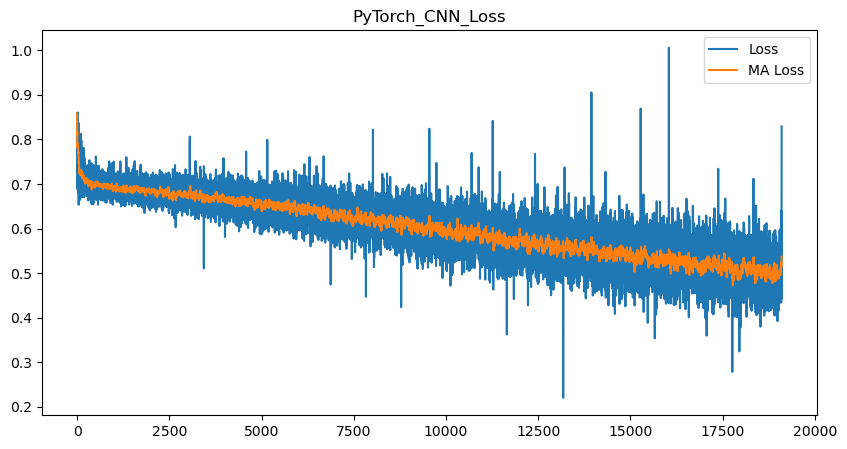

In [33]:
plt.figure(figsize=(10,5))
plt.title('PyTorch_CNN_Loss')
plt.plot(loss_count,label='Loss')
plt.plot(pd.DataFrame(np.array(loss_count)).rolling(20,1).mean(),label='MA Loss')
plt.legend()
plt.savefig('./cnn_model/CNN_classification_loss.png')
plt.show()

## 对模型的修正，和论文方法对齐